## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, roc_auc_score







## Loading the dataset

In [ ]:
# Write my code here to read the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# loading data into a pandas dataframe
path="/content/drive/MyDrive/Great_Learning/files/Machine Learning/Loan_Modelling.csv"
Loan_Modelling_df=pd.read_csv(path)

In [ ]:
# copying data to another variable to avoid any changes to original data
Loan_data_copy_df= Loan_Modelling_df.copy()

## Data Overview

* Observations
* Sanity checks

**View the first and last 5 rows of the dataset**

In [ ]:
Loan_data_copy_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
Loan_data_copy_df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1



**Understand the shape of the dataset**

In [ ]:
Loan_data_copy_df.shape

(5000, 14)

##**Observation:**

   I see 5000 rows and 14 columns present in the Data.

*   **5000 Rows:**  The dataset contains 5000 observations or individual records.

*   **14 Columns:**  Each observation is described by 14 attributes or features.




## **Check Data Types**

#### **Check the data types of the columns for the dataset**

In [ ]:
Loan_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


####**Observations:**

I see below columns as int64 data type

 *    ID  
 *    Age
 *    Experience
 *    Income
 *    ZIPCode
 *    Family
 *    Education
 *    Mortagage
 *    Personal_loan
 *    Securities_Account
 *    CD_Account
 *    Online
 *    Creditcard  13 columns are of data type int64, indicating integer values.

**Below columns as float64 data type:**

*    1 column (CCAvg) is of data type float64, indicating continuous numerical values.

## Statistical summary of the data

In [ ]:
Loan_data_copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### **Observation**

**1. ID:**

*   Count: 5000
*   Mean: 2500.50
*   Standard Deviation: 1443.52
*   Range: From 1 to 5000
*   Observation: The ID column is well-distributed across its range and seems to be a unique identifier for each record.

**2. Age:**

*   Count: 5000
*   Mean: 45.34
*   Standard Deviation: 11.46
*   Range: From 23 to 67
*   Observation: The age distribution shows a wide range of ages with a mean *  around mid-40s, indicating a diverse age group in the dataset.

**3. Experience:**

*   Count: 5000
*  Mean: 20.10
*  Standard Deviation: 11.47
*  Range: From -3 to 43
*  Observation: The negative values might indicate missing or erroneous data. Overall, experience varies widely with a mean of around 20 years.

**4. Income**:

*  Count: 5000
*  Mean: 73.77
*  Standard Deviation: 46.03
*  Range: From 8 to 224
*  Observation: Income has a substantial range and variability, with a mean income of about 73.77. There may be outliers or a skewed distribution given the high standard deviation.

**5. ZIPCode:**

*  Count: 5000
*  Mean: 93169.26
*  Standard Deviation: 1759.46
*  Range: From 90005 to 96651
*  Observation: ZIP code values have a wide range and significant variability, possibly reflecting different geographical regions.

**6. Family:**

*  Count: 5000
*  Mean: 2.40
*  Standard Deviation: 1.15
*  Range: From 1 to 4
*  Observation: Most records have a small family size, with a mean family size of around 2.4.

**7. CCAvg:**

*  Count: 5000
*  Mean: 1.94
*  Standard Deviation: 1.75
*  Range: From 0 to 10
*  Observation: The average credit card spending (CCAvg) shows a high degree of variability, with a mean value of about 1.94.

**8. Education:**

*  Count: 5000
*  Mean: 1.88
*  Standard Deviation: 0.84
*  Range: From 1 to 3
*  Observation: Education levels are categorized into a small range, with a mean indicating the most common educational level.

**9. Mortgage:**

*  Count: 5000
*  Mean: 56.50
*  Standard Deviation: 101.71
*  Range: From 0 to 635
*  Observation: Mortgage values have a high variability, with a mean of 56.50. This suggests that many individuals have low or no mortgage, but there are some with very high amounts.

**10. Personal_Loan:**

*  Count: 5000
*  Mean: 0.096
*  Standard Deviation: 0.295
*  Range: 0 to 1
*  Observation: The mean value indicates a low proportion of individuals with personal loans, with many entries being zero.

**11. Securities_Account:**

*  Count: 5000
*  Mean: 0.104
*  Standard Deviation: 0.306
*  Range: 0 to 1
*  Observation: Similar to personal loans, this indicates a low proportion of individuals with securities accounts.

**12. CD_Account:**

*  Count: 5000
*  Mean: 0.060
*  Standard Deviation: 0.238
*  Range: 0 to 1
*  Observation: Very few individuals have CD accounts, with a mean value close to zero.

**13. Online**:

*  Count: 5000
*  Mean: 0.597
*  Standard Deviation: 0.491
*  Range: 0 to 1
*  Observation: About 60% of individuals have an online account, suggesting it is relatively common among the dataset.

**14. CreditCard:**

*  Count: 5000
*  Mean: 0.294
*  Standard Deviation: 0.456
*  ange: 0 to 1

*  Observation: Around 30% of individuals have a credit card, showing moderate penetration.

 ## Sanity checks

#### **1. Data Consistency Checks**

In [ ]:
# Check for duplicates
duplicates = Loan_data_copy_df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [ ]:
# Check for negative values in important numerical columns (e.g., Income, Mortgage, CCAvg)
negative_values = Loan_data_copy_df[['Income', 'Mortgage', 'CCAvg']].lt(0).sum()
print(f"Negative values in numerical columns:\n{negative_values}")

Negative values in numerical columns:
Income      0
Mortgage    0
CCAvg       0
dtype: int64


In [ ]:
# Check for any remaining missing values
missing_values = Loan_data_copy_df.isnull().sum()
print(f"Missing values in the dataset:\n{missing_values}")

Missing values in the dataset:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


####**Observations:**

**Data Consistency Check:**

1.   **Duplicate Records:** The dataset contains no duplicate records, which means every row is unique. There is no need for any further action regarding duplication

2.   **Negative Values:** There are no negative values in the important numerical columns such as Income, Mortgage, and CCAvg. This confirms that the data is within valid ranges for these attributes, and no erroneous negative values are present.

3.   **Missing Values:** No missing values are present in any columns after feature engineering, meaning the dataset is complete and fully populated with valid data.

#### **2. Data Range Checks**

In [ ]:
# Check range of Age (should be between 18 and 100 for realistic values)
age_range = Loan_data_copy_df['Age'].between(18, 100).all()
print(f"Are all ages between 18 and 100? {age_range}")

Are all ages between 18 and 100? True


In [ ]:
# Check range of Income (should be non-negative and within a reasonable range, e.g., up to $1M)
income_range = Loan_data_copy_df['Income'].between(0, 1000000).all()
print(f"Are all incomes within the range 0 to 1M? {income_range}")

Are all incomes within the range 0 to 1M? True


In [ ]:
# Check for any infinite or NaN values in the log-transformed features
log_income_inf = np.isinf(Loan_data_copy_df['Income']).sum()
log_ccavg_inf = np.isinf(Loan_data_copy_df['CCAvg']).sum()

In [ ]:
print(f"Number of infinite values in Log_Income: {log_income_inf}")
print(f"Number of infinite values in Log_CCAvg: {log_ccavg_inf}")

Number of infinite values in Log_Income: 0
Number of infinite values in Log_CCAvg: 0


#### **Observations:**

**1. Age Range Check:**

*   All age values in the dataset are between 18 and 100, meaning there are no
unrealistic or incorrect age entries. This confirms that the data in the Age column is valid and doesn't require any further treatment.

**2. Income Range Check:**

*   All income values are within the specified range (0 to $1M). This indicates that there are no negative or excessively high income values, suggesting that the data for the Income column is clean and falls within a realistic range.

**3. Infinite or NaN Values in Log-Transformed Features:**

*   The check for infinite values in the Income and CCAvg columns shows that there are no infinite values, meaning that no invalid transformations (e.g., division by zero) have occurred. This ensures that the log-transformation process, if applied, was performed correctly without introducing any errors.

#### **3. Categorical Values Check**

In [ ]:
# Check unique values of categorical columns to ensure they're within expected categories
categorical_columns = ['Education', 'Family', 'CreditCard', 'Personal_Loan']

In [ ]:
for column in categorical_columns:
    print(f"Unique values for {column}: {Loan_data_copy_df[column].unique()}")

Unique values for Education: [1 2 3]
Unique values for Family: [4 3 1 2]
Unique values for CreditCard: [0 1]
Unique values for Personal_Loan: [0 1]



##### **Observations:**

**1. Education:**

*   The unique values for Education are [1, 2, 3], likely corresponding to different education levels (e.g., undergraduate, graduate, advanced/professional). These values fall within the expected range, and no unexpected or out-of-range values are present.

**2. Family:**

*   The unique values for Family are [4, 3, 1, 2], which likely represent the number of family members. These values seem reasonable, covering family sizes from 1 to 4.

**3. CreditCard:**

*    The unique values for CreditCard are [0, 1], representing a binary indicator for whether the customer owns a credit card (0 = No, 1 = Yes). These values align with expectations.

**4. Personal_Loan:**

*   The unique values for Personal_Loan are [0, 1], indicating whether the customer accepted a personal loan (0 = No, 1 = Yes). These values are consistent with the binary nature of this target variable.

#### **4. Data Distribution Check**

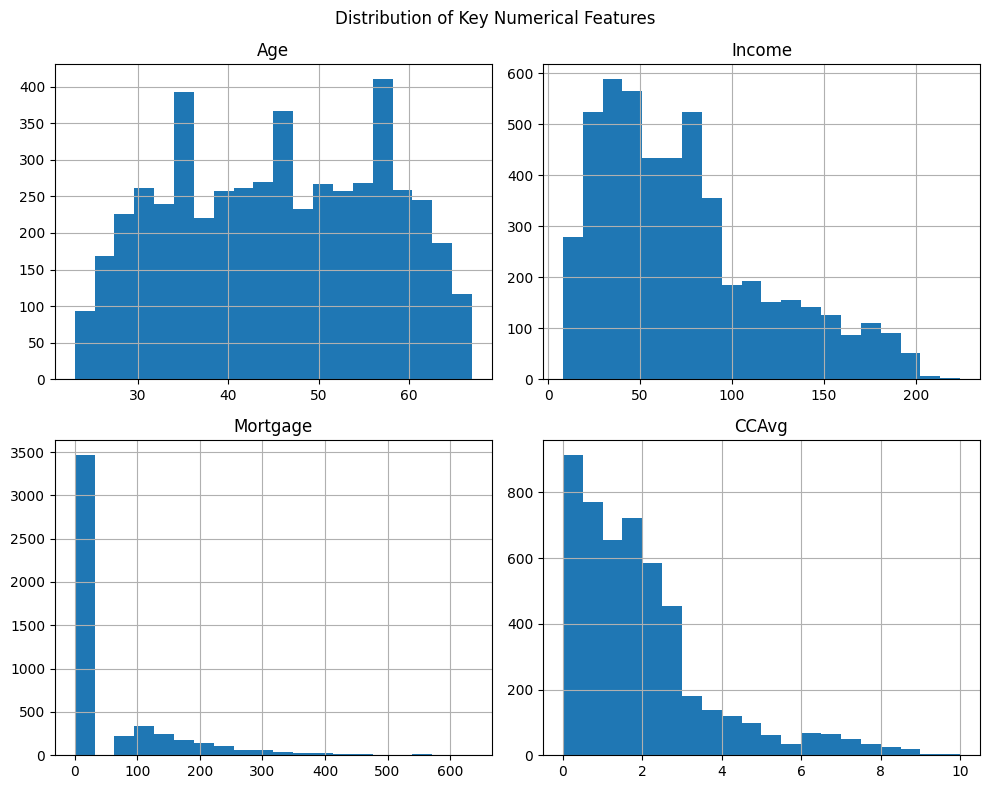

In [ ]:
# Plot histograms for key numerical features to check distribution
Loan_data_copy_df[['Age', 'Income', 'Mortgage', 'CCAvg']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

#### **Observations from the distribution plots:**

**1. Age:**

*   The distribution of Age is approximately uniform across various age groups, with noticeable peaks around ages 30, 40, and 60. This suggests that the dataset covers a wide range of customer ages, with no particular group being overly dominant.

**2. Income:**

*   The distribution of Income is right-skewed, with most customers having incomes between 0 and 100. The distribution tapers off as income increases, indicating fewer customers with very high incomes.

**3. Mortgage:**

*   The Mortgage variable shows a highly right-skewed distribution, with the majority of customers having no mortgage. A small number of customers have mortgages up to 600, indicating potential outliers in the higher range.

**4. CCAvg (Credit Card Average Spending):**

*   The distribution of CCAvg is also right-skewed, with most customers spending between 0 and 4 on their credit cards, while fewer customers have significantly higher credit card spending.

#### **5.  Target Variable Check**
####Check the distribution of the target variable Personal_Loan

In [ ]:
# Check the distribution of the target variable (Personal_Loan)
loan_distribution = Loan_data_copy_df['Personal_Loan'].value_counts(normalize=True) * 100
print(f"Percentage of customers with and without a loan:\n{loan_distribution}")

Percentage of customers with and without a loan:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


#### **Observations:**


*   90.4% of customers do not have a personal loan (Personal_Loan = 0).

*   9.6% of customers have a personal loan (Personal_Loan = 1).

**1. Imbalance:**

*   There is a significant class imbalance in my dataset, with the majority of customers not having a personal loan. This could potentially impact the performance of my predictive models, especially if they are sensitive to class imbalances.

**2. Modeling Implications:**

*   For models predicting the likelihood of a personal loan, I'll need to consider techniques to address this imbalance. Options include resampling methods (like oversampling the minority class or undersampling the majority class), using weighted loss functions, or employing algorithms designed to handle imbalanced datasets.

**3. Evaluation Metrics:**

*   Traditional accuracy might not be a reliable metric due to the imbalance. Consider using metrics like precision, recall, F1-score, or AUC-ROC to better assess model performance.

####Check the distribution of the target variable Education

In [ ]:
# Check the distribution of the target variable (Education)
loan_distribution = Loan_data_copy_df['Education'].value_counts(normalize=True) * 100
print(f"Percentage of customers with and without a loan:\n{loan_distribution}")

Percentage of customers with and without a loan:
Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64


####**Observations:**

*   41.92% of customers have Education Level 1.

*   30.02% of customers have Education Level 3.

*   28.06% of customers have Education Level 2.

**1. Relatively Balanced:**

*   The education levels are relatively balanced compared to the Personal_Loan variable. There isn’t a dominant category, which might make this variable useful in distinguishing between different customer profiles.

**2. Feature Engineering:**

*   Since the education levels are not highly imbalanced, I can use this feature directly in my model. However, if needed, I might consider creating dummy variables or one-hot encoding if I plan to use it in certain types of models.

**3. Exploration:**

 *   It may be useful to further explore the relationship between education levels and other variables, such as Personal_Loan, to see if certain education levels are more likely to influence the likelihood of having a personal loan

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## The below functions need to be defined to carry out the EDA.

##### **Univariate Analysis**

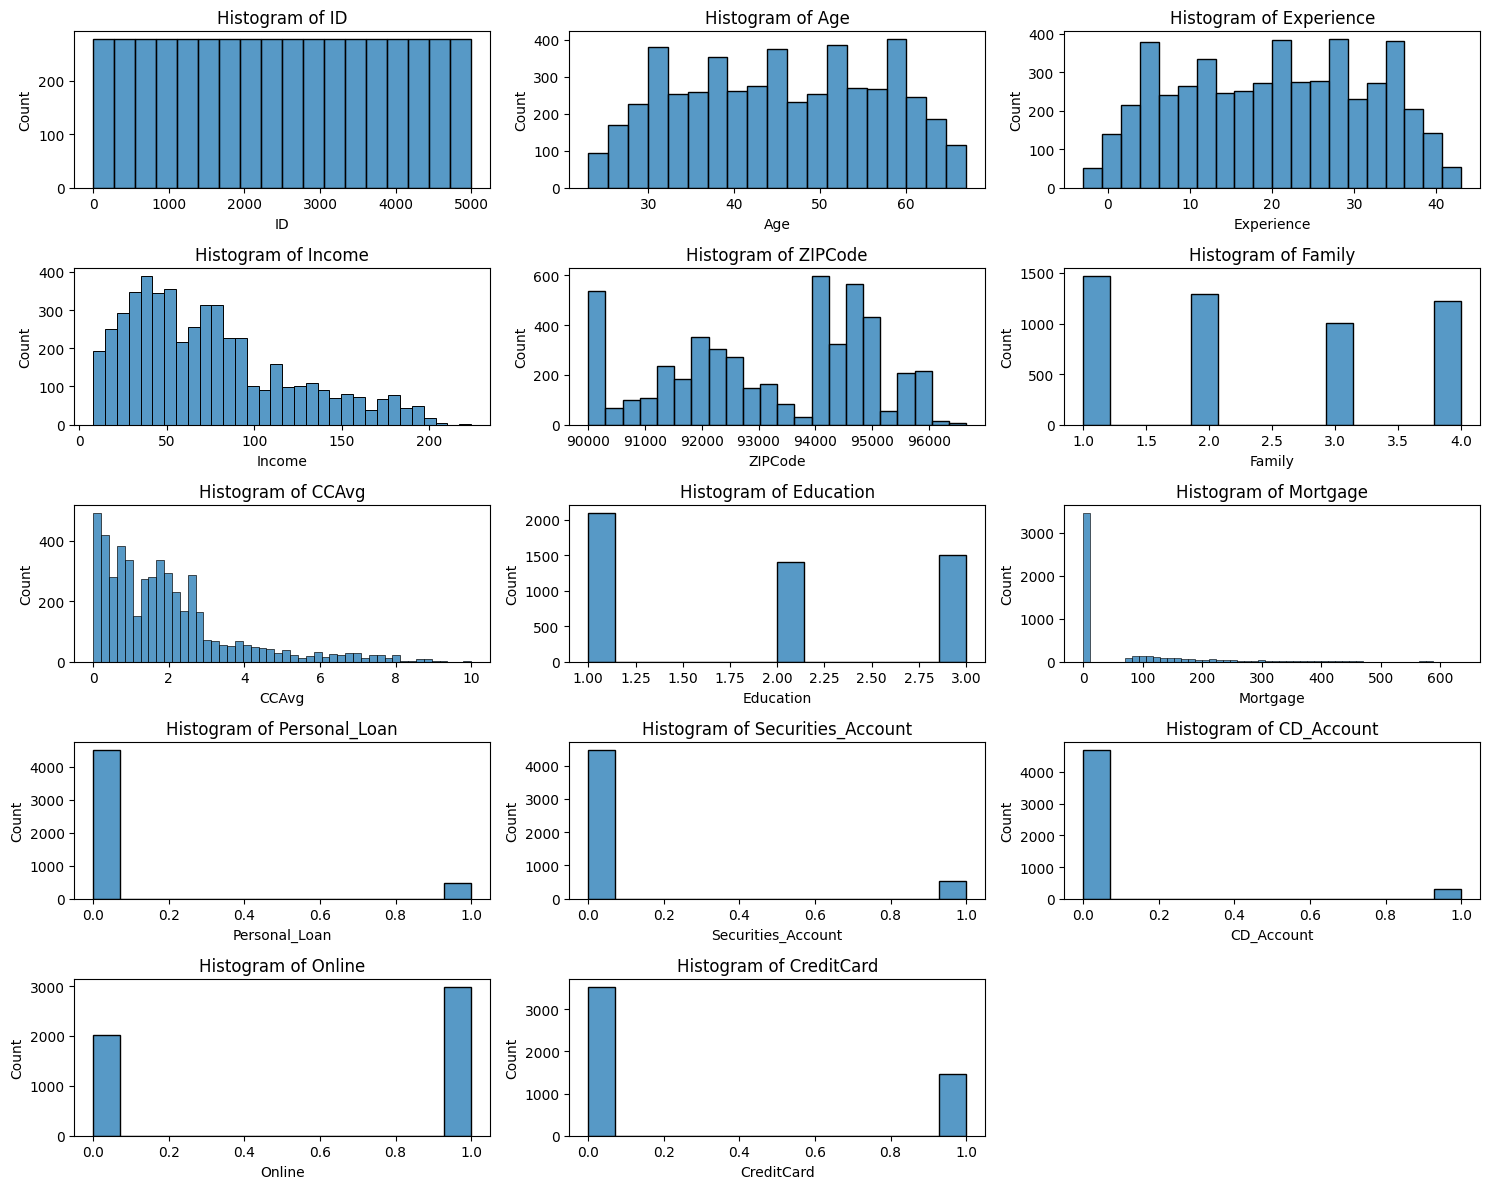

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 12))

# number of features (10 in my case)
num_features = len(Loan_data_copy_df.columns)

# setting the number of rows and columns based on the number of features
rows = (num_features // 3) + 1 if num_features % 3 != 0 else num_features // 3
cols = 3

# plotting the histogram for each numerical feature
for i, feature in enumerate(Loan_data_copy_df.columns):
    plt.subplot(rows, cols, i+1)  # adjust grid size dynamically
    sns.histplot(data=Loan_data_copy_df, x=feature)  # plot the histogram
    plt.title(f'Histogram of {feature}')  # add title for each subplot

plt.tight_layout()  # to add spacing between plots
plt.show()

##Histograms provided, here are some key observations for each variable:

**ID:**

 *   The ID variable is uniformly distributed, as expected, since it is a unique identifier.

**Age:**

The Age distribution appears to be approximately normal, with most customers falling in the 30 to 60-year age range.

**Experience:**

*    The Experience variable has a somewhat uniform distribution, with slightly more customers having lower years of experience.

**Income:**

 The Income distribution is right-skewed, meaning that most customers have lower incomes, but a few have significantly higher incomes.

**ZIP Code:**

*   The distribution of ZIPCode seems scattered across a few distinct regions, indicating that customers are concentrated in specific geographical areas.

**Family Size:**

*   The Family variable has a near-uniform distribution across family sizes of 1 to 4.

**CCAvg (Credit Card Average Spending):**

*   This is heavily right-skewed, with most customers having a low average credit card spending, but a small number of customers have much higher spending.

**Education:**

*    This variable shows clear categories with more customers having education levels 1 and 2, indicating fewer people have reached higher education levels.

**Mortgage:**

*   Most customers have either no mortgage or very low amounts. There are very few customers with higher mortgage amounts.

Personal Loan:

*   The distribution shows that a minority of customers have taken personal loans (represented by 1), while the majority have not (represented by 0).

**Securities Account:**

*    Very few customers have a securities account, as indicated by the high frequency of the 0 value.

**CD Account:**

*    Similar to the Securities Account, the majority of customers do not have a CD account.

**Online:**

 *   A large proportion of customers use online banking, as indicated by the high frequency of the 1 value.

**Credit Card:**

 *   Most customers do not use a credit card, as represented by the high frequency of 0.

### **General Insights:**

**Right-skewed variables:**

 *   Income, CCAvg, and Mortgage are right-skewed, indicating a large proportion of customers with lower values and a smaller proportion with higher values.

**Binary variables:**

*   Many of the binary variables (Personal Loan, Securities Account, CD Account, Online, Credit Card) show a clear imbalance between the two classes, particularly with fewer customers having a securities account, CD account, or a personal loan.

**Education:**

 *   The majority of customers have lower education levels, and higher education levels are less frequent.

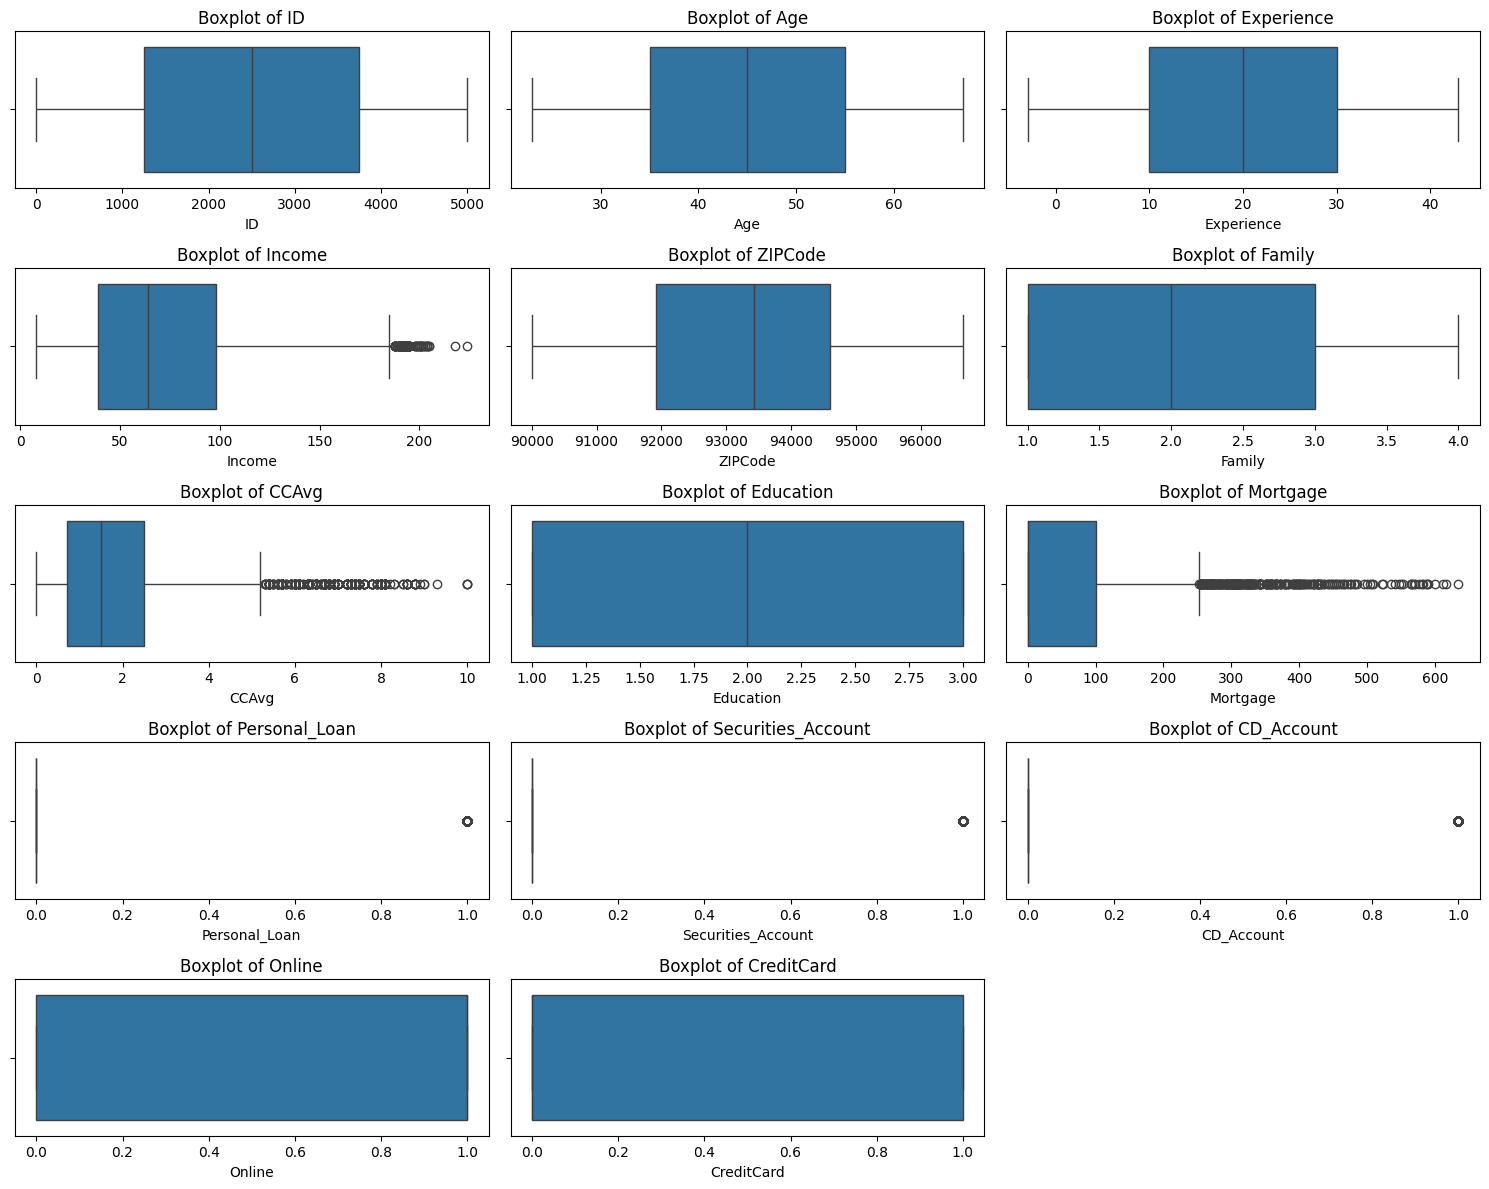

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 12))

# number of features (10 in my case)
num_features = len(Loan_data_copy_df.columns)

# setting the number of rows and columns based on the number of features
rows = (num_features // 3) + 1 if num_features % 3 != 0 else num_features // 3
cols = 3

# plotting the boxplot for each numerical feature
for i, feature in enumerate(Loan_data_copy_df.columns):
    plt.subplot(rows, cols, i+1)    # adjust grid size dynamically
    sns.boxplot(data=Loan_data_copy_df, x=feature)    # plot the boxplot
    plt.title(f'Boxplot of {feature}')  # add title for each subplot

plt.tight_layout()   # to add spacing between plots
plt.show()

## Boxplot provided, here are some key observations for each variable:

#### **Observation:**

**ID:**

*   The ID variable is unique to each customer, showing a uniform spread. Since it's just a unique identifier, no significant insights can be drawn from this variable.

**Age:**

 *   The age distribution is fairly symmetrical, centered around the 30–60 age range. There are no significant outliers, indicating most customers are likely middle-aged.

**Experience:**

*   Like age, experience is symmetrically distributed with no significant outliers. Most customers have between 10 to 30 years of experience, suggesting a mature and experienced customer base.

**Income:**

 *   Income is highly skewed to the right, with many outliers representing customers with very high income. Most customers have relatively lower income levels compared to a few high-earning individuals.

**ZIP Code:**

*   The ZIP Code distribution shows distinct regions, with no significant outliers. It reflects customers coming from a few specific geographic areas without much variability.

**Family Size:**

*    Family size is symmetrically distributed, and the most common family sizes range between 1 to 4 members. This suggests the dataset covers customers with small to medium-sized families.

**CCAvg (Credit Card Average Spending):**

*    This variable is heavily skewed to the right, with several customers having very high average credit card spending (outliers). Most customers tend to have low spending on credit cards.

**Education:**

*   Education is categorized into distinct levels, and the distribution across these levels appears relatively balanced. There are no significant outliers, indicating customers come from diverse educational backgrounds.

**Mortgage:**

*    Mortgage values are right-skewed, with many customers having little or no mortgage, and a few outliers with high mortgage amounts. This suggests that a large portion of customers either don’t own a home or have minimal mortgage obligations, while some have significant mortgage amounts.

**Personal Loan:**

*   The binary nature of this variable shows most customers have not taken a personal loan. No outliers are present.

**Securities Account:**

*    Most customers do not hold a securities account, and there are no outliers. This could indicate that securities accounts are less common in the dataset.

**CD Account:**

*    Like the Securities Account variable, most customers do not have a CD account. There are no significant outliers here either, meaning the distribution is relatively standard for this variable.

##**Binary Variables:**

**Skewness in Numerical Variables:**

*   Many of the numerical variables like Income, CCAvg, and Mortgage are highly right-skewed with several high-value outliers. This suggests that while most customers have moderate to low values in these categories, a small group of high-income or high-spending customers stands out.

*   The binary variables (Personal Loan, Securities Account, CD Account) are dominated by 0s, showing that most customers do not have personal loans, securities accounts, or CD accounts. Handling these imbalanced variables appropriately will be important for modeling.

## Bivariate Analysis

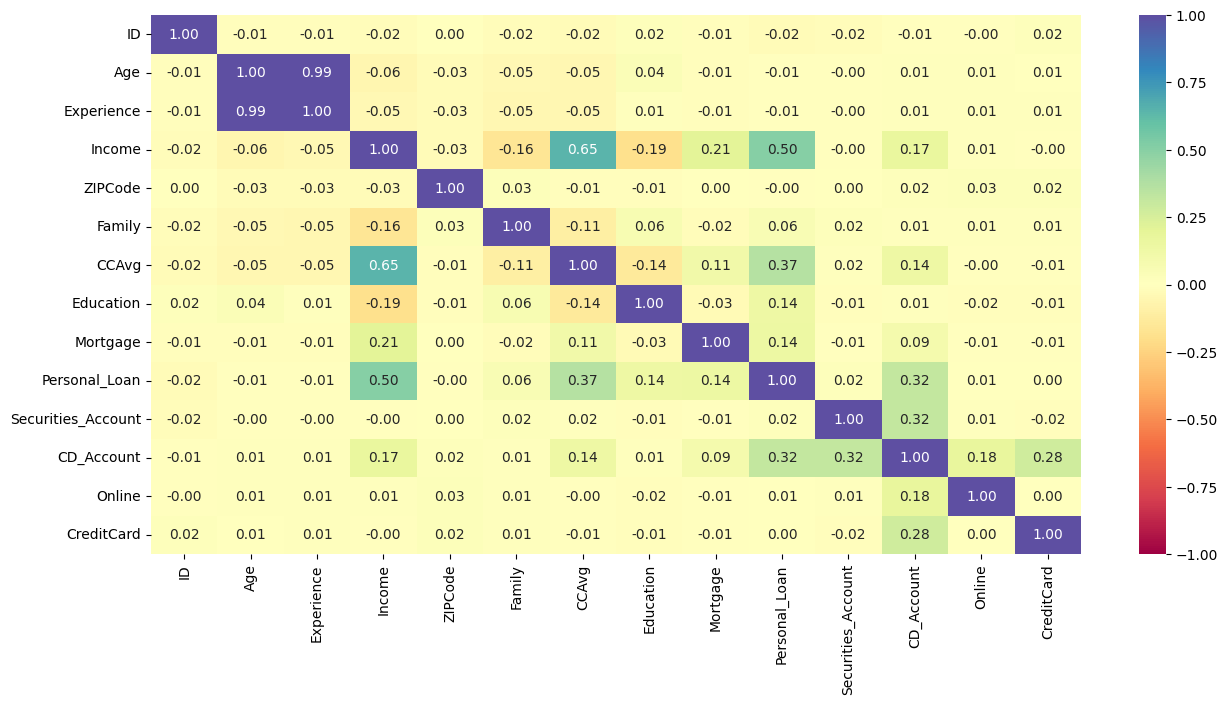

In [ ]:
# defining the size of the plot
plt.figure(figsize=(15, 7))
sns.heatmap(Loan_data_copy_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


#### Based on the correlation heatmap its provided from my Loan_data_copy_df DataFrame, here are some observations:

**Income and Personal Loan:**

*   There is a positive correlation of 0.50 between Income and Personal Loan, indicating that higher-income customers are more likely to purchase a personal loan.

**Experience and Age:**

*   These two variables are almost perfectly correlated with a value of 0.99, which makes sense because experience is generally dependent on age. This could indicate potential multicollinearity, which might affect some models.

**CCAvg and Income:**

*   There is a strong positive correlation of 0.65 between CCAvg (Credit Card Average Spending) and Income. This suggests that higher-income customers tend to spend more on their credit cards.

**Education and Personal Loan:**

*   There is a moderate positive correlation of 0.37 between Education and Personal Loan, implying that customers with higher levels of education are more likely to take personal loans.

**Mortgage and Personal Loan:**

*    A small positive correlation of 0.14 exists between Mortgage and Personal Loan, suggesting a weak relationship between having a mortgage and taking a personal loan.

**CD Account and Personal Loan:**

*   The correlation between CD Account and Personal Loan is 0.32, indicating that those with a Certificate of Deposit (CD) account may be more likely to take personal loans.

**Securities Account and Personal Loan:**

*   There is a weak positive correlation of 0.02 between Securities Account and Personal Loan, showing little to no relationship between holding a securities account and taking a personal loan.

### **Multicollinearity Concerns:**

*   Given the high correlation between Age and Experience (0.99), one of these variables might need to be dropped or transformed to avoid multicollinearity issues when using regression models.

*   This heatmap highlights key relationships that could inform my predictive modeling process, especially for personal loan prediction.

## 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

In [ ]:
def histogram_boxplot(Loan_data_copy_df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Loan_data_copy_df: DataFrame containing the data
    feature: Column name for which the plot is to be generated
    figsize: Size of the figure (default (12,7))
    kde: Whether to show the density curve on the histogram (default False)
    bins: Number of bins for the histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots (Boxplot & Histogram)

    sns.boxplot(
        data=Loan_data_copy_df, x=feature, ax=ax_box2, showmeans=True, color="Yellow"
    )  # Boxplot with mean value indicated

    sns.histplot(
        data=Loan_data_copy_df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=Loan_data_copy_df, x=feature, kde=kde, ax=ax_hist2
    )  # Histogram

    ax_hist2.axvline(
       Loan_data_copy_df[feature].mean(), color="Red", linestyle="--"
    )  # Red dashed line indicating the mean

    ax_hist2.axvline(
        Loan_data_copy_df[feature].median(), color="black", linestyle="-"
    )  # Black solid line indicating the median

    plt.show()

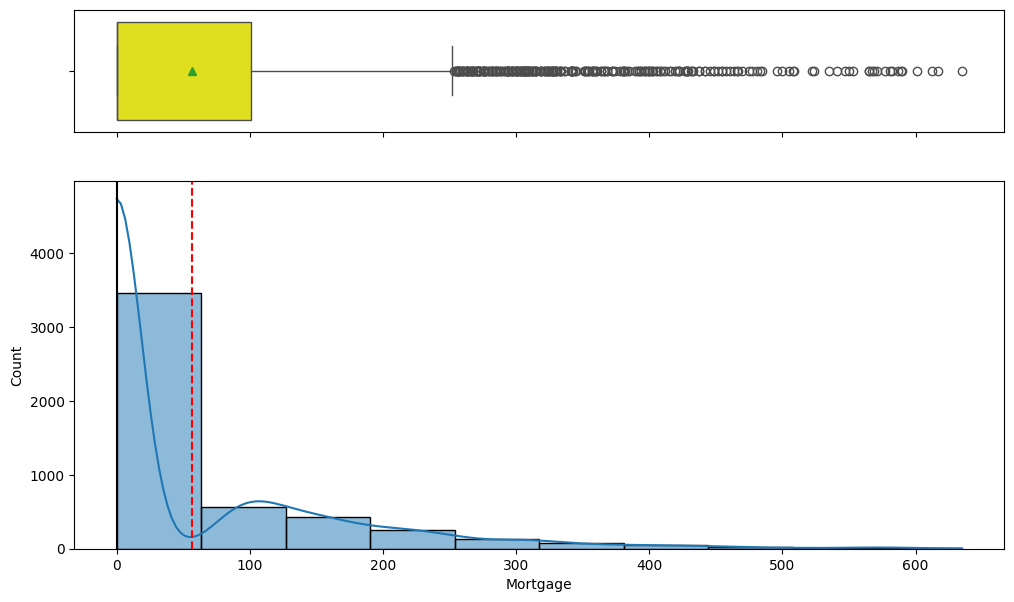

In [ ]:
# Call the function to generate the plot for 'Mortgage' with KDE and 10 bins
histogram_boxplot(Loan_data_copy_df, 'Mortgage', kde=True, bins=10)

#### **Observations:**

**1. Majority of Customers Have No Mortgage:**



*   The histogram shows that a significant portion of customers (around 4,000) have a mortgage value of 0. This suggests that most customers do not have a mortgage, which is likely driving the bulk of the data to cluster around this point.

**2. Right-Skewed Distribution:**

The distribution is heavily right-skewed with a long tail. This means that while most customers have either no mortgage or a low mortgage value, a few customers have significantly higher mortgage values.

**3. Outliers:**

*   The box plot clearly shows a high number of outliers, represented by circles. These outliers correspond to customers with higher mortgage values, particularly above 200K.

*   The mean (indicated by the green triangle) is far from the median, reinforcing the presence of outliers.

**4. Mean vs. Median:**

*   The mean (red dashed line) is noticeably higher than the median (black solid line), which is typical for a right-skewed distribution where the outliers on the higher end pull the mean upward.

**5. KDE Curve:**

The KDE curve aligns with the histogram, showing a sharp peak at zero mortgage, then a gentle decline with smaller peaks as we move toward higher mortgage values.

## **Mortgage Summary Statistics**

In [ ]:
# Summary statistics
mortgage_summary = Loan_data_copy_df['Mortgage'].describe()
print(mortgage_summary)

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


#### **Observation:**

*   Count: 5,000 entries

*   Mean: 56.50

*   Standard Deviation (std): 101.71

*   Minimum (min): 0

*   25th Percentile (25%): 0

*   50th Percentile (median, 50%): 0

*   75th Percentile (75%): 101

*   Maximum (max): 635

**1. Skewed Distribution:**

*    The median and the 25th percentile being 0 suggest that a large proportion of the customers have no mortgage. This indicates a right-skewed distribution with many customers having low or no mortgage balances.

**2. High Variability:**

*   The high standard deviation (101.71) relative to the mean (56.50) indicates significant variability in mortgage amounts. This is further supported by the large difference between the mean and the 75th percentile.

**3. Outliers:**

*   The maximum value (635) compared to the 75th percentile (101) suggests that there are some high-value outliers. These outliers might impact the model and need to be handled appropriately, depending on my analysis goals.


### **Histogram Mortgage**

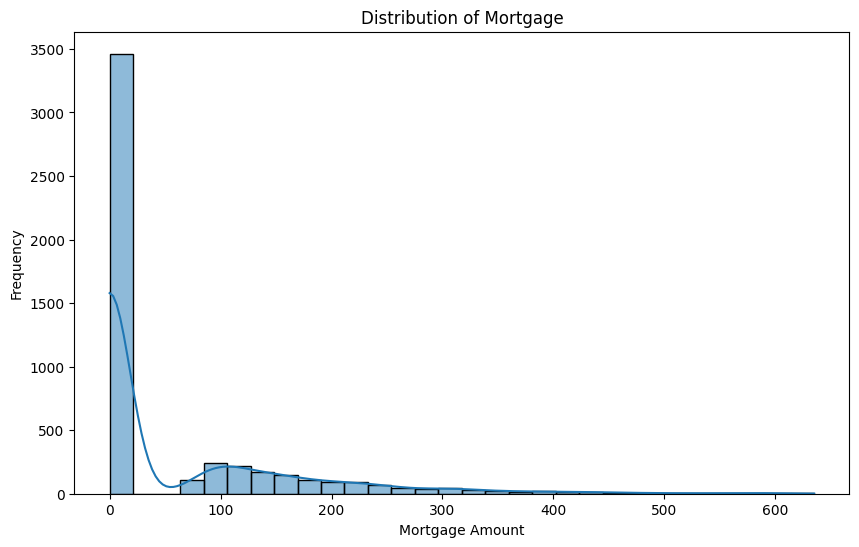

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Loan_data_copy_df['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Amount')
plt.ylabel('Frequency')
plt.show()

### **Box Plot Mortgage**

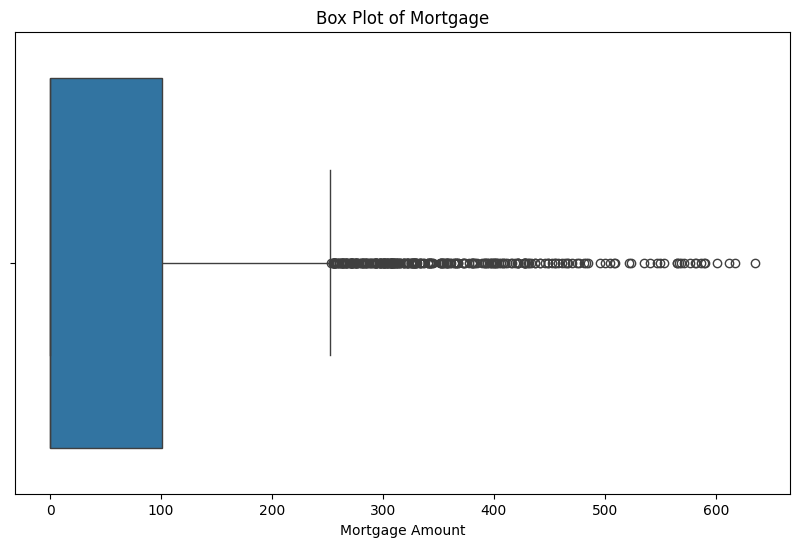

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Loan_data_copy_df['Mortgage'])
plt.title('Box Plot of Mortgage')
plt.xlabel('Mortgage Amount')
plt.show()

#### **Observation:**

**Histogram**

*  The histogram will likely show a large peak at 0, indicating that many customers do not have a mortgage.

*   The distribution of mortgage amounts is skewed to the right. This means there are more mortgages with lower amounts than higher amounts.

* The KDE plot (density plot) suggests that the distribution is continuous, and it might follow a normal distribution with a long tail to the right.

## **2. How many customers have credit cards?**

In [ ]:
# Counting the number of customers with credit cards
credit_card_count = Loan_data_copy_df[Loan_data_copy_df['CreditCard'] == 1].shape[0]
total_customers = Loan_data_copy_df.shape[0]
credit_card_percentage = (credit_card_count / total_customers) * 100

print(f"Number of customers with credit cards: {credit_card_count}")
print(f"Percentage of customers with credit cards: {credit_card_percentage:.2f}%")

Number of customers with credit cards: 1470
Percentage of customers with credit cards: 29.40%


#### **Observations:**
**Credit_Card**
*   Number of customers with credit cards: 1,470
*   Percentage of customers with credit cards: 29.40%

**1. Credit Card Ownership:**

*  About 29.40% of customers have a credit card. This indicates that a significant portion of the customer base does not hold a credit card, which could be relevant for understanding customer behavior and preferences.

**2. Potential Insights::**

* The fact that nearly 30% of customers have credit cards could be used to explore correlations between credit card ownership and other variables, such as loan status or mortgage amount. This might reveal whether credit card ownership is associated with other financial behaviors or characteristics.

**3. Feature Usage:**

*  This variable could be a useful predictor in my models. It might help to understand the relationship between having a credit card and other features like loan approval or mortgage balance.

## **3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = Loan_data_copy_df.corr()

In [ ]:
# Extracting correlation with the target attribute 'Personal_Loan'
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
print(personal_loan_correlation)

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


### Correlation Matrix and Target Attribute('Personal_Loan')

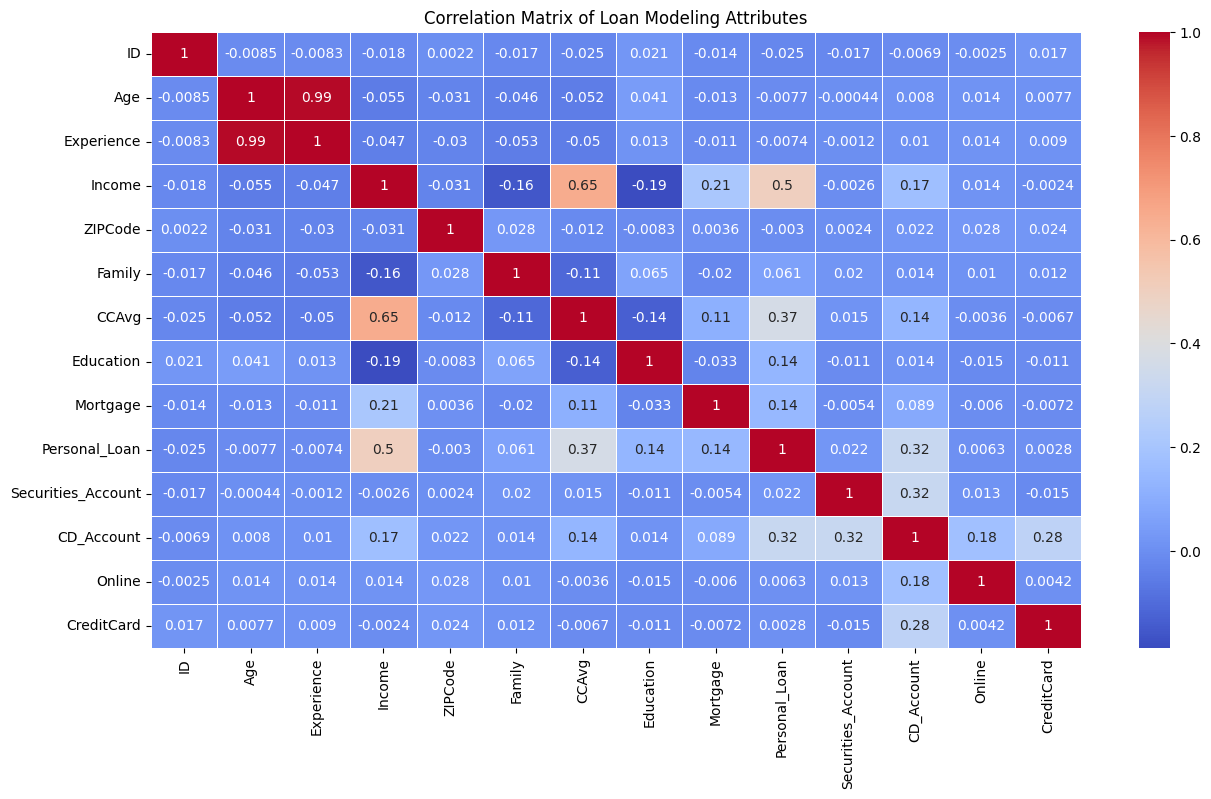

In [ ]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Loan Modeling Attributes')
plt.show()

#### Observations from the Correlation Matrix and Target Attribute('Personal_Loan')

**1.  Highest Positive Correlations:**

*  **Income (0.502):** The strongest positive correlation with Personal_Loan is income. This suggests that customers with higher incomes are more likely to have a personal loan.

*   **CCAvg (0.367):** The average spending on credit cards is also positively correlated with the likelihood of taking a personal loan. Higher credit card usage may indicate more active financial behavior.

*  **CD_Account (0.316):** Owning a certificate of deposit (CD) account shows a moderate positive correlation with having a personal loan, indicating that customers with this type of account may also have personal loans.

*  **Mortgage (0.142):** There is a weak positive correlation between mortgage amounts and having a personal loan.

*  **Education (0.137):** Higher education levels also show a weak positive correlation with personal loan ownership.

**2.  Low/Negligible Correlations:**

*   Family (0.061), Securities_Account (0.022), Online (0.006), CreditCard (0.003): These variables have very weak positive correlations with the target variable, indicating minimal influence on personal loan ownership.

*   ZIPCode (-0.003), Experience (-0.007), Age (-0.008): These variables have negative but very weak correlations with personal loans, implying little to no relationship.

**3.  ID (-0.025):**

*   The ID has a very slight negative correlation with Personal_Loan, which is expected, as it serves only as an identifier and doesn't provide meaningful information in the model.

**4. Key Drivers:**

*   The main drivers for predicting personal loan ownership appear to be Income, CCAvg, and CD_Account, which have the highest positive correlations.

*   **Weak Predictors:** Variables like ZIPCode, Experience, and Age are not strongly associated with personal loan ownership and might have limited predictive power in the model.

**5.  Modeling Implications:**

*   Focus on variables like Income, CCAvg, and CD_Account when building models, as they have stronger relationships with the target variable.

*   Consider exploring feature engineering, especially for weakly correlated variables, to see if they can add more predictive value in combination with other features.

#### **4. How does a customer's interest in purchasing a loan vary with their age?**

In [ ]:
# Creating an age group column (optional, for more granularity)
Loan_data_copy_df['Age_Group'] = pd.cut(Loan_data_copy_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

In [ ]:
# Calculating the percentage of customers who took a personal loan within each age group
age_loan_interest =Loan_data_copy_df.groupby('Age')['Personal_Loan'].mean() * 100


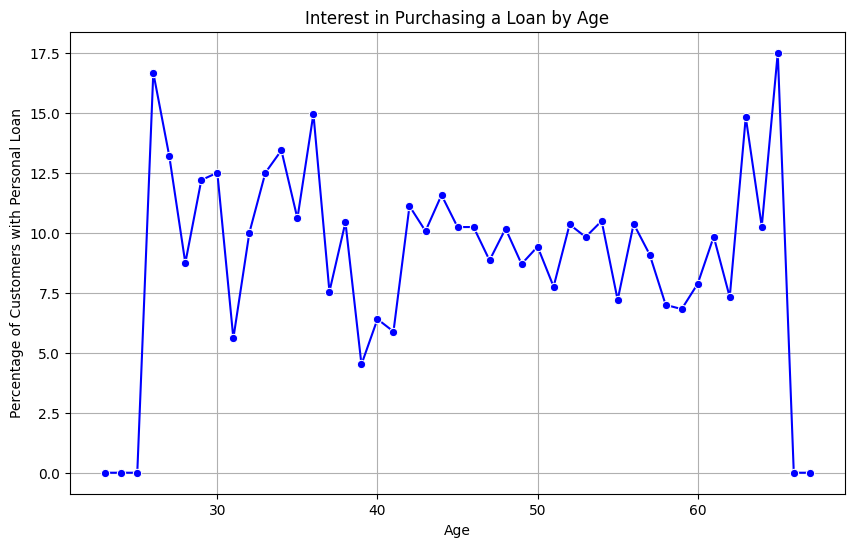

In [ ]:
# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_loan_interest.index, y=age_loan_interest.values, marker='o', color='blue')
plt.title('Interest in Purchasing a Loan by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Customers with Personal Loan')
plt.grid(True)
plt.show()

#### **Observations:**

**1. Fluctuations in Younger Age Groups (20-30):**

*   There is a sharp increase in the percentage of customers with personal loans in their late 20s. The interest peaks at around age 27, where about 17.5% of customers have personal loans.

*   However, there is notable volatility within this age group, with some ages having significantly lower percentages.

**2. Relative Stability in Middle Age Groups (30-50):**

*   Between the ages of 30 to 50, the percentage of customers with personal loans tends to stabilize around the 10-15% range, with some minor fluctuations..

*   This suggests that people in this age range are more consistent in their loan acquisition behavior compared to younger customers.

**3. Slight Decline in Older Age Groups (50-60):**

*   In the 50-60 age range, the percentage of customers with personal loans shows a slight decline, hovering around 10% with less fluctuation.

*   This might indicate a lower demand or need for personal loans as individuals approach retirement age.

#### **Sharp Increase and Drop Beyond 60 Years:**

*   Interestingly, there is a spike in the percentage of customers with personal loans at around age 62 (about 17%), but this sharply drops to 0% at age 65 and beyond.

*   This could suggest that a small subset of older customers still takes loans, but after a certain age (likely retirement), loan acquisition significantly diminishes.

#### **5. How does a customer's interest in purchasing a loan vary with their education?**

In [ ]:
# Calculate the average loan interest by education level
education_loan_interest = Loan_data_copy_df.groupby('Education')['Personal_Loan'].mean() * 100


In [ ]:
# Sort by education level if it's categorical
education_loan_interest = education_loan_interest.sort_index()

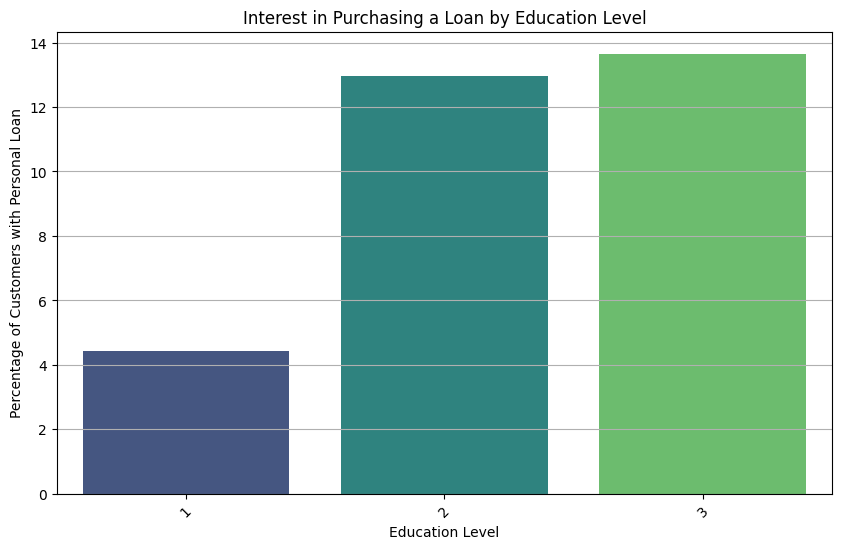

In [ ]:
# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=education_loan_interest.index, y=education_loan_interest.values, palette='viridis')
plt.title('Interest in Purchasing a Loan by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Customers with Personal Loan')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

#### **Observations:**

#### **1. Education Level 3 - Highest Level:**

*   Customers with the highest education level (labeled as 3) have the highest percentage of personal loans, with about 13.5% of them having a loan.

*   This suggests that individuals with a higher educational background may have better financial stability, higher income levels, or more access to financial products like loans.

#### **2. Education Level 2 - Mid-Level:**

*   Customers with education level 2 show significant interest in loans, with around 12.5% taking personal loans.

*   This group is also highly inclined towards personal loans, though slightly less than the highest education level group.

**3. Education Level 1 - Lowest Level:**

*  The lowest education level group (labeled as 1) has the smallest proportion of personal loans, with only about 4.5% of individuals taking out loans.

*  This suggests that individuals with lower education may have less access to financial resources or may be more conservative in taking on personal debt.

*   **Positive correlation between education and loan interest:** As education level increases, the likelihood of customers taking personal loans also increases. This could be due to factors such as higher earning potential, better financial literacy, and more access to credit among individuals with higher education.

*  **Lower interest for lower education levels:** Individuals with lower education seem to be less inclined or have fewer opportunities to take loans.


## **Data Preprocessing**

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## **1. Missing value treatment**

In [ ]:
# Missing Values
Loan_data_copy_df.replace('', np.nan, inplace=True)
missing_values_Loan_copy_df = Loan_data_copy_df.isnull().sum()
missing_values_Loan_copy_df

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


#### **Observation:**

*   I do not see any missing values in the data.

*   Every column has 0 missing values, meaning that my dataset is fully populated with data in all rows and columns.

## **Check for Duplicate values**

In [ ]:
# Check for duplicate rows
duplicate_rows = Loan_data_copy_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


**Observation on Duplicate Rows:**

*   The output shows that there are no duplicate rows in the Loan_data_copy_df dataset.

*   This means that each row in the dataset is unique, and there is no redundancy in the records.

## **Check for Duplicate values**


Dropping the columns with all unique values

In [ ]:
Loan_data_copy_df.ID.nunique()


5000

The ID column contains only unique values, so we can drop it

In [ ]:
drop_Loan_data_copy_df = Loan_data_copy_df.drop(['ID'], axis=1)

## **2. Feature engineering (if needed)**


In [ ]:
# checking the number of uniques in the zip code
drop_Loan_data_copy_df["ZIPCode"].nunique()

467

In [ ]:
# Define the categorical columns first
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

In [ ]:
 #Convert ZIPCode to string and take the first two digits
drop_Loan_data_copy_df["ZIPCode"] = drop_Loan_data_copy_df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    drop_Loan_data_copy_df["ZIPCode"].str[0:2].nunique(),
)
drop_Loan_data_copy_df["ZIPCode"] = drop_Loan_data_copy_df["ZIPCode"].str[0:2]

# Convert ZIPCode to a categorical data type
drop_Loan_data_copy_df["ZIPCode"] = drop_Loan_data_copy_df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
# Ensure that these columns exist in the DataFrame before processing
existing_cat_cols = [col for col in cat_cols if col in drop_Loan_data_copy_df.columns]

In [ ]:
# Converting the data type of the existing categorical features to 'category'
drop_Loan_data_copy_df[existing_cat_cols] = drop_Loan_data_copy_df[existing_cat_cols].astype("category")


In [ ]:
# Displaying the data types to verify the conversion
print(drop_Loan_data_copy_df.dtypes)

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
Age_Group             category
dtype: object


#### **Observations:**
**1. ZIP Code Handling:**

*   I initially had 467 unique ZIP codes. After taking the first two digits, I reduced the number of unique values to 7. This is a common practice to reduce dimensionality and group similar areas, which could simplify the model and improve generalization.

*   I correctly converted the ZIPCode column to a categorical type after modifying it.

**2.Categorical Columns:**

*   I defined a list of categorical columns (cat_cols) which includes:

*   "Education"
*   "Personal_Loan"
*   "Securities_Account"
*   "CD_Account"
*   "Online"
*   "CreditCard"
*   "ZIPCode"

*   I then verified that these columns exist in my DataFrame and converted their data type to category.

**3.Data Type Conversion:**

*   I attempted to convert categorical columns to the category data type. Based on the final columns list shown, it seems that the conversion was successful for the available ategorical columns:

*   'Education'
*   'Personal_Loan'
*   'Securities_Account'
*   'CD_Account'
*   'Online'
*   'CreditCard'
*   'ZIPCode'

*   The drop_Loan_data_copy_df DataFrame now has categorical data types for these columns.

**Iterative Improvement:**

*   Based on model performance, iteratively refine my feature engineering, encoding, and extraction steps to improve the model’s predictive power.

## **3. Outlier detection and treatment (if needed)**

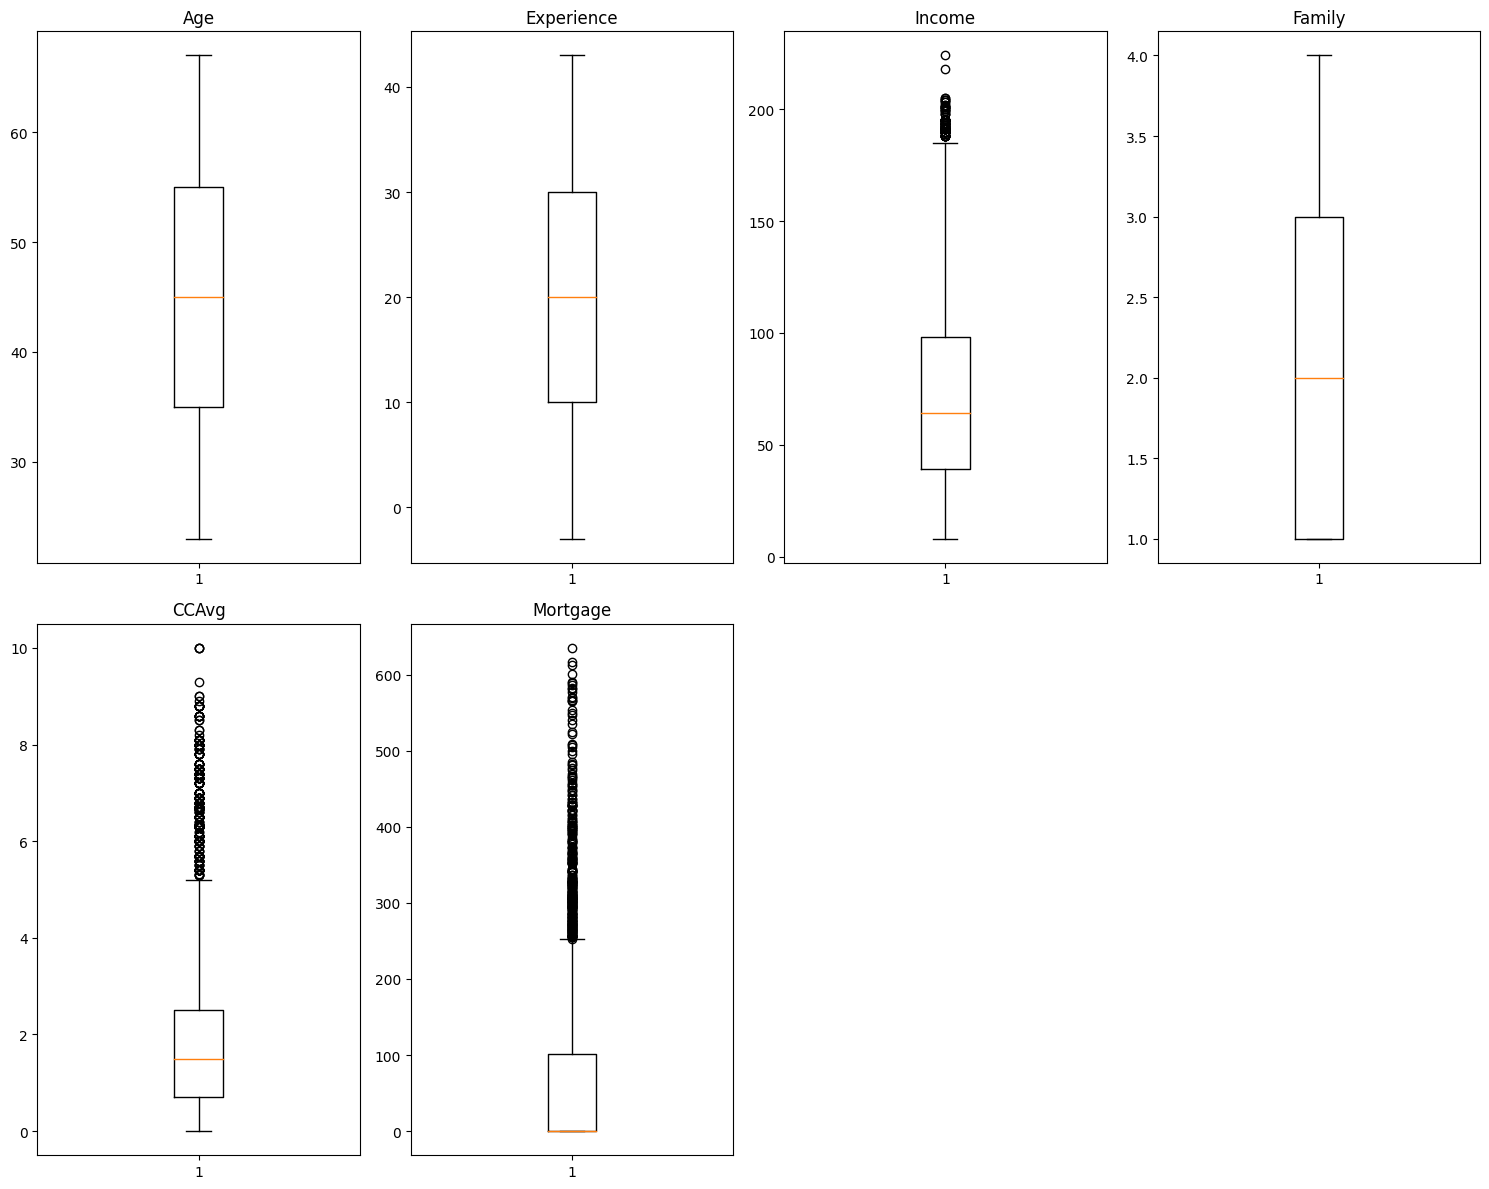

In [ ]:
# outlier detection using boxplot
# Assuming drop_Loan_data_copy_df is already defined and contains numeric data
numeric_columns = drop_Loan_data_copy_df.select_dtypes(include=np.number).columns.tolist()

# Define the number of rows and columns dynamically
num_vars = len(numeric_columns)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Dynamically adjust rows and columns
    plt.boxplot(drop_Loan_data_copy_df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

## Observation:

**Age & Experience:**

*   The Age and Experience variables appear well-distributed, with no extreme outliers.

*   Both variables are somewhat symmetric, showing a reasonable range of values without significant deviation at the extremes.

**Income:**

*   The Income boxplot reveals a few noticeable outliers, which can be seen as data points above the whiskers.

*   The central range of Income is concentrated below 150, but there are individuals with much higher incomes.

**Family:**

*   This variable seems to have a fairly symmetrical distribution, though the range is small. There are no visible outliers in this category.

**CCAvg (Credit Card Average Spending):**

*   There are outliers at the higher end of the CCAvg distribution, with some customers having significantly higher average spending than others.

*   The majority of data is concentrated between 0 and 5.

**Mortgage:**

*   There are several outliers in the Mortgage variable, indicating some customers have unusually high mortgage values compared to the rest.

*   The bulk of mortgage values is concentrated between 0 and 200, with a few extreme values going over 600.

## **Data Preprocessing**

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

In [ ]:
# Detect outliers in the 'Income' column
outliers_income = detect_outliers_iqr(drop_Loan_data_copy_df, 'Income')
print(f"Number of outliers in 'Income': {len(outliers_income)}")

Number of outliers in 'Income': 96


In [ ]:
# Cap the outliers at the 1st and 99th percentiles
lower_cap = drop_Loan_data_copy_df['Income'].quantile(0.01)
upper_cap = drop_Loan_data_copy_df['Income'].quantile(0.99)
drop_Loan_data_copy_df['Income'] = np.clip(drop_Loan_data_copy_df['Income'], lower_cap, upper_cap)

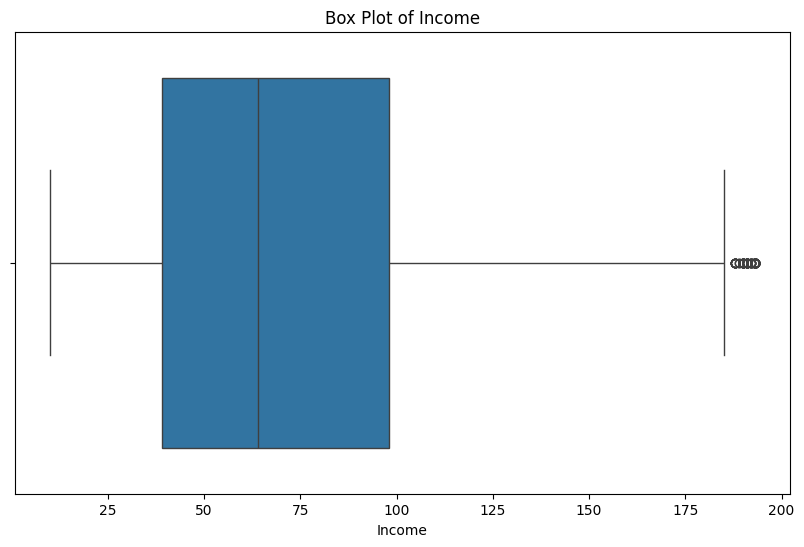

In [ ]:
# Visualization using a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=drop_Loan_data_copy_df['Income'])
plt.title('Box Plot of Income')
plt.show()

## Observations:

**1. Outlier Detection:**

*   Using the Interquartile Range (IQR) method, the code detects outliers in the Income column. Any data point that lies below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) is considered an outlier.

*   The code prints the total number of outliers detected, which is 96 for the Income column.

**2. Outlier Capping:**

*   Outliers are capped using the 1st percentile (lower cap) and 99th percentile (upper cap) of the Income distribution. This approach prevents extreme values from unduly influencing the analysis or the performance of a machine learning model.

**3. DataFrame After Outlier Removal:**

*   The DataFrame shape after removing the outliers using IQR is (4904, 14), indicating that 96 rows were removed from the original DataFrame of 5,000 rows.

*   This reduction directly corresponds to the number of outliers detected earlier.

**4. Visualization:**

*   After the outliers have been capped, a boxplot is generated for the Income column to visualize the updated distribution.

### **Based on the Process:**

**5. Outlier Detection:**

*   The IQR method identified 96 outliers in the Income column. This suggests that a considerable number of customers have extreme income values that might affect analysis..

**Capping:**

*   Capping the outliers at the 1st and 99th percentiles ensures that the most extreme outliers do not dominate the analysis. This method is useful when I want to maintain the integrity of the data without completely removing outliers.

**6. Post-Capping Visualization:**

*   After capping, the new boxplot for Income should show a reduction in the spread of the data, especially for extreme values. While outliers might still exist visually, they are within a more manageable range compared to before capping.

## **4. Preparing data for modeling**

In [ ]:
# Define a mapping for the age group ranges to their midpoints
age_group_mapping = {
    '20-30': 25,
    '30-40': 35,
    '40-50': 45,
    '50-60': 55,
    '60-70': 65
}

In [ ]:
# Apply the mapping to the age-group column
drop_Loan_data_copy_df['age_group_mapped'] = drop_Loan_data_copy_df['Age_Group'].map(age_group_mapping)

### **Observations:**

**Transformation to Numeric Data:**

*   This transformation is beneficial because most machine learning models work better with numeric values. Converting categorical age ranges into numeric midpoints makes the data more interpretable for these models.

**Loss of Specificity:**

*   While this approach simplifies the age groups, it assumes that all values in each range are equally represented by the midpoint. For example, the age group '20-30' is fully represented by the value 25. If the original distribution within age ranges isn't uniform, this could lead to a small loss of detail.

**Improved Usability for Modeling:**

*   Using midpoints for Age_Group allows this feature to be directly used in models that expect numerical input, such as decision trees, linear models, and neural networks.

## **5. Any other preprocessing steps (if needed)**

In [ ]:
X = drop_Loan_data_copy_df.drop(["Personal_Loan", "Experience","Age_Group"], axis=1)
Y = drop_Loan_data_copy_df["Personal_Loan"]

In [ ]:
#Prepare data for modeling
X

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,age_group_mapped
0,25,49,91,4,1.6,1,0,1,0,0,0,25
1,45,34,90,3,1.5,1,0,1,0,0,0,45
2,39,11,94,1,1.0,1,0,0,0,0,0,35
3,35,100,94,1,2.7,2,0,0,0,0,0,35
4,35,45,91,4,1.0,2,0,0,0,0,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92,1,1.9,3,0,0,0,1,0,25
4996,30,15,92,4,0.4,1,85,0,0,1,0,25
4997,63,24,93,2,0.3,3,0,0,0,0,0,65
4998,65,49,90,3,0.5,2,0,0,0,1,0,65


In [ ]:
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

# Get the feature names after one-hot encoding
feature_names = X.columns.tolist()

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###**Observations:**

**Proper Preparation for Modeling:**

*   The process of dropping the target variable and splitting the data into features (X) and target (Y) is done correctly. This ensures that no target leakage occurs when I train my model.

**One-Hot Encoding is Appropriate:**

*   I have used pd.get_dummies() to handle the categorical features, ZIPCode and Education. This step is necessary because most machine learning models cannot handle categorical variables directly. By dropping the first category with drop_first=True, I avoid creating perfect collinearity between the dummy variables, which is important for models like linear regression.

**Feature Names Extraction:**

*   By storing the column names after one-hot encoding, I can track the features used in the model. This can be helpful for feature importance analysis later.

**Reproducible Results:**

*   Using random_state=1 in train_test_split() ensures that I can reproduce the exact same train/test split every time I run the code. This is important for consistency in experimentation.

**Next Step:**

*   Now ready to train my model using X_train and y_train, and later evaluate it on X_test and y_test.

## **Model Evaluation Criterion**

In [ ]:
#The model_performance_classification_sklearn function will be used to check the model performance of models.
# Function to compute metrics for classification model performance
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#The confusion_matrix_sklearnfunction will be used to plot confusion matrix
# Function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Plot the decision tree
def plot_tree(model, feature_names):
  plt.figure(figsize=(20, 30))
  out = tree.plot_tree(
      model,
      feature_names=feature_names,  # Use updated feature names
      filled=True,
      fontsize=9,
      node_ids=False,
      class_names=None,
  )
  # Optionally, add arrows to tree splits
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("Darkblue")
          arrow.set_linewidth(1)

  plt.show()

def print_tree_text(model, columns):
  # Display the feature importance
  print(
      pd.DataFrame(
          model.feature_importances_, columns=["Imp"], index=columns
      ).sort_values(by="Imp", ascending=False)
  )

# Visualize feature importance using a bar chart
def plot_feature_importance(model, feature_names):
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(8, 8))
  plt.title("Feature Importances")
  plt.barh(range(len(indices)), importances[indices], color="green", align="center")
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel("Relative Importance")
  plt.show()



#Model Performance Comparison and Final Model Selection
# Function to calculate performance metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }


In [ ]:

def estimator_Pre_Pruning(max_depth_values, max_leaf_nodes_values, min_samples_split_values):
  best_estimator = None
  # Initialize variables to store the best model and its performance
  best_score_diff = float('inf')
  best_test_score = 0.0

  # Iterate over all combinations of the specified parameter values
  for max_depth in max_depth_values:
      for max_leaf_nodes in max_leaf_nodes_values:
          for min_samples_split in min_samples_split_values:

              # Initialize the tree with the current set of parameters
              estimator = DecisionTreeClassifier(
                  max_depth=max_depth,
                  max_leaf_nodes=max_leaf_nodes,
                  min_samples_split=min_samples_split,
                  class_weight='balanced',  # Corrected the typo here
                  random_state=42
              )

              # Fit the model to the training data
              estimator.fit(X_train, y_train)

              # Make predictions on the training and test sets
              y_train_pred = estimator.predict(X_train)
              y_test_pred = estimator.predict(X_test)

              # Calculate recall scores for training and test sets
              train_recall_score = recall_score(y_train, y_train_pred)
              test_recall_score = recall_score(y_test, y_test_pred)

              # Calculate the absolute difference between training and test recall scores
              score_diff = abs(train_recall_score - test_recall_score)

              # Update the best estimator and best score if the current one has a smaller score difference
              if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                  best_score_diff = score_diff
                  best_test_score = test_recall_score
                  best_estimator = estimator
  # Print the best parameters
  print("Best parameters found:")
  print(f"Max depth: {best_estimator.max_depth}")
  print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
  print(f"Min samples split: {best_estimator.min_samples_split}")
  print(f"Best test recall score: {best_test_score}")
  return best_estimator

## **Model Building**

## **Decision Tree Model on the Base_model Training-data**

In [ ]:
# Base model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_train = base_model.predict(X_train)

# Evaluation
print("Base Model Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Base Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       331

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Display the confusion matrix
print(conf_matrix)

[[3169    0]
 [   0  331]]


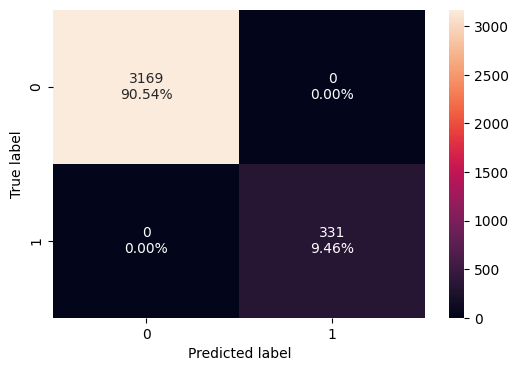

In [ ]:
confusion_matrix_sklearn(base_model, X_train, y_train)

In [ ]:
model_performance_classification_sklearn(base_model, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### **Observations:**

*   I have trained a base decision tree model (DecisionTreeClassifier) and evaluated it on the training data. Here are the key observations from my results.

**Accuracy on Training Data**:

*   **Accuracy:** 1.0 (100%)

*   The model has a perfect accuracy score, meaning it has correctly classified all the samples in the training data.

**Classification Report:**

*   Precision, Recall, and F1-Score for both classes (0 and 1) are all 1.0. This suggests that.

*   The model perfectly distinguishes between customers who will and will not take a personal loan (based on training data).

*   Precision and Recall for both classes are at their highest possible values, meaning no false positives or false negatives.

**Support values:**

*   Class 0: 3169 samples (did not take personal loans).

*   Class 1: 331 samples (took personal loans).

**Confusion Matrix:**

*   3169 true negatives: All 3169 customers who did not take a loan (class 0)were correctly predicted as class 0.

*   331 true positives: All 331 customers who took a loan (class 1) were correctly predicted as class 1.

*   0 false positives: No customers were incorrectly classified as loan-takers.

*   0 false negatives: No customers were incorrectly classified as non-loan-takers.

## **Visualizing the Decision Tree (Base_model)**

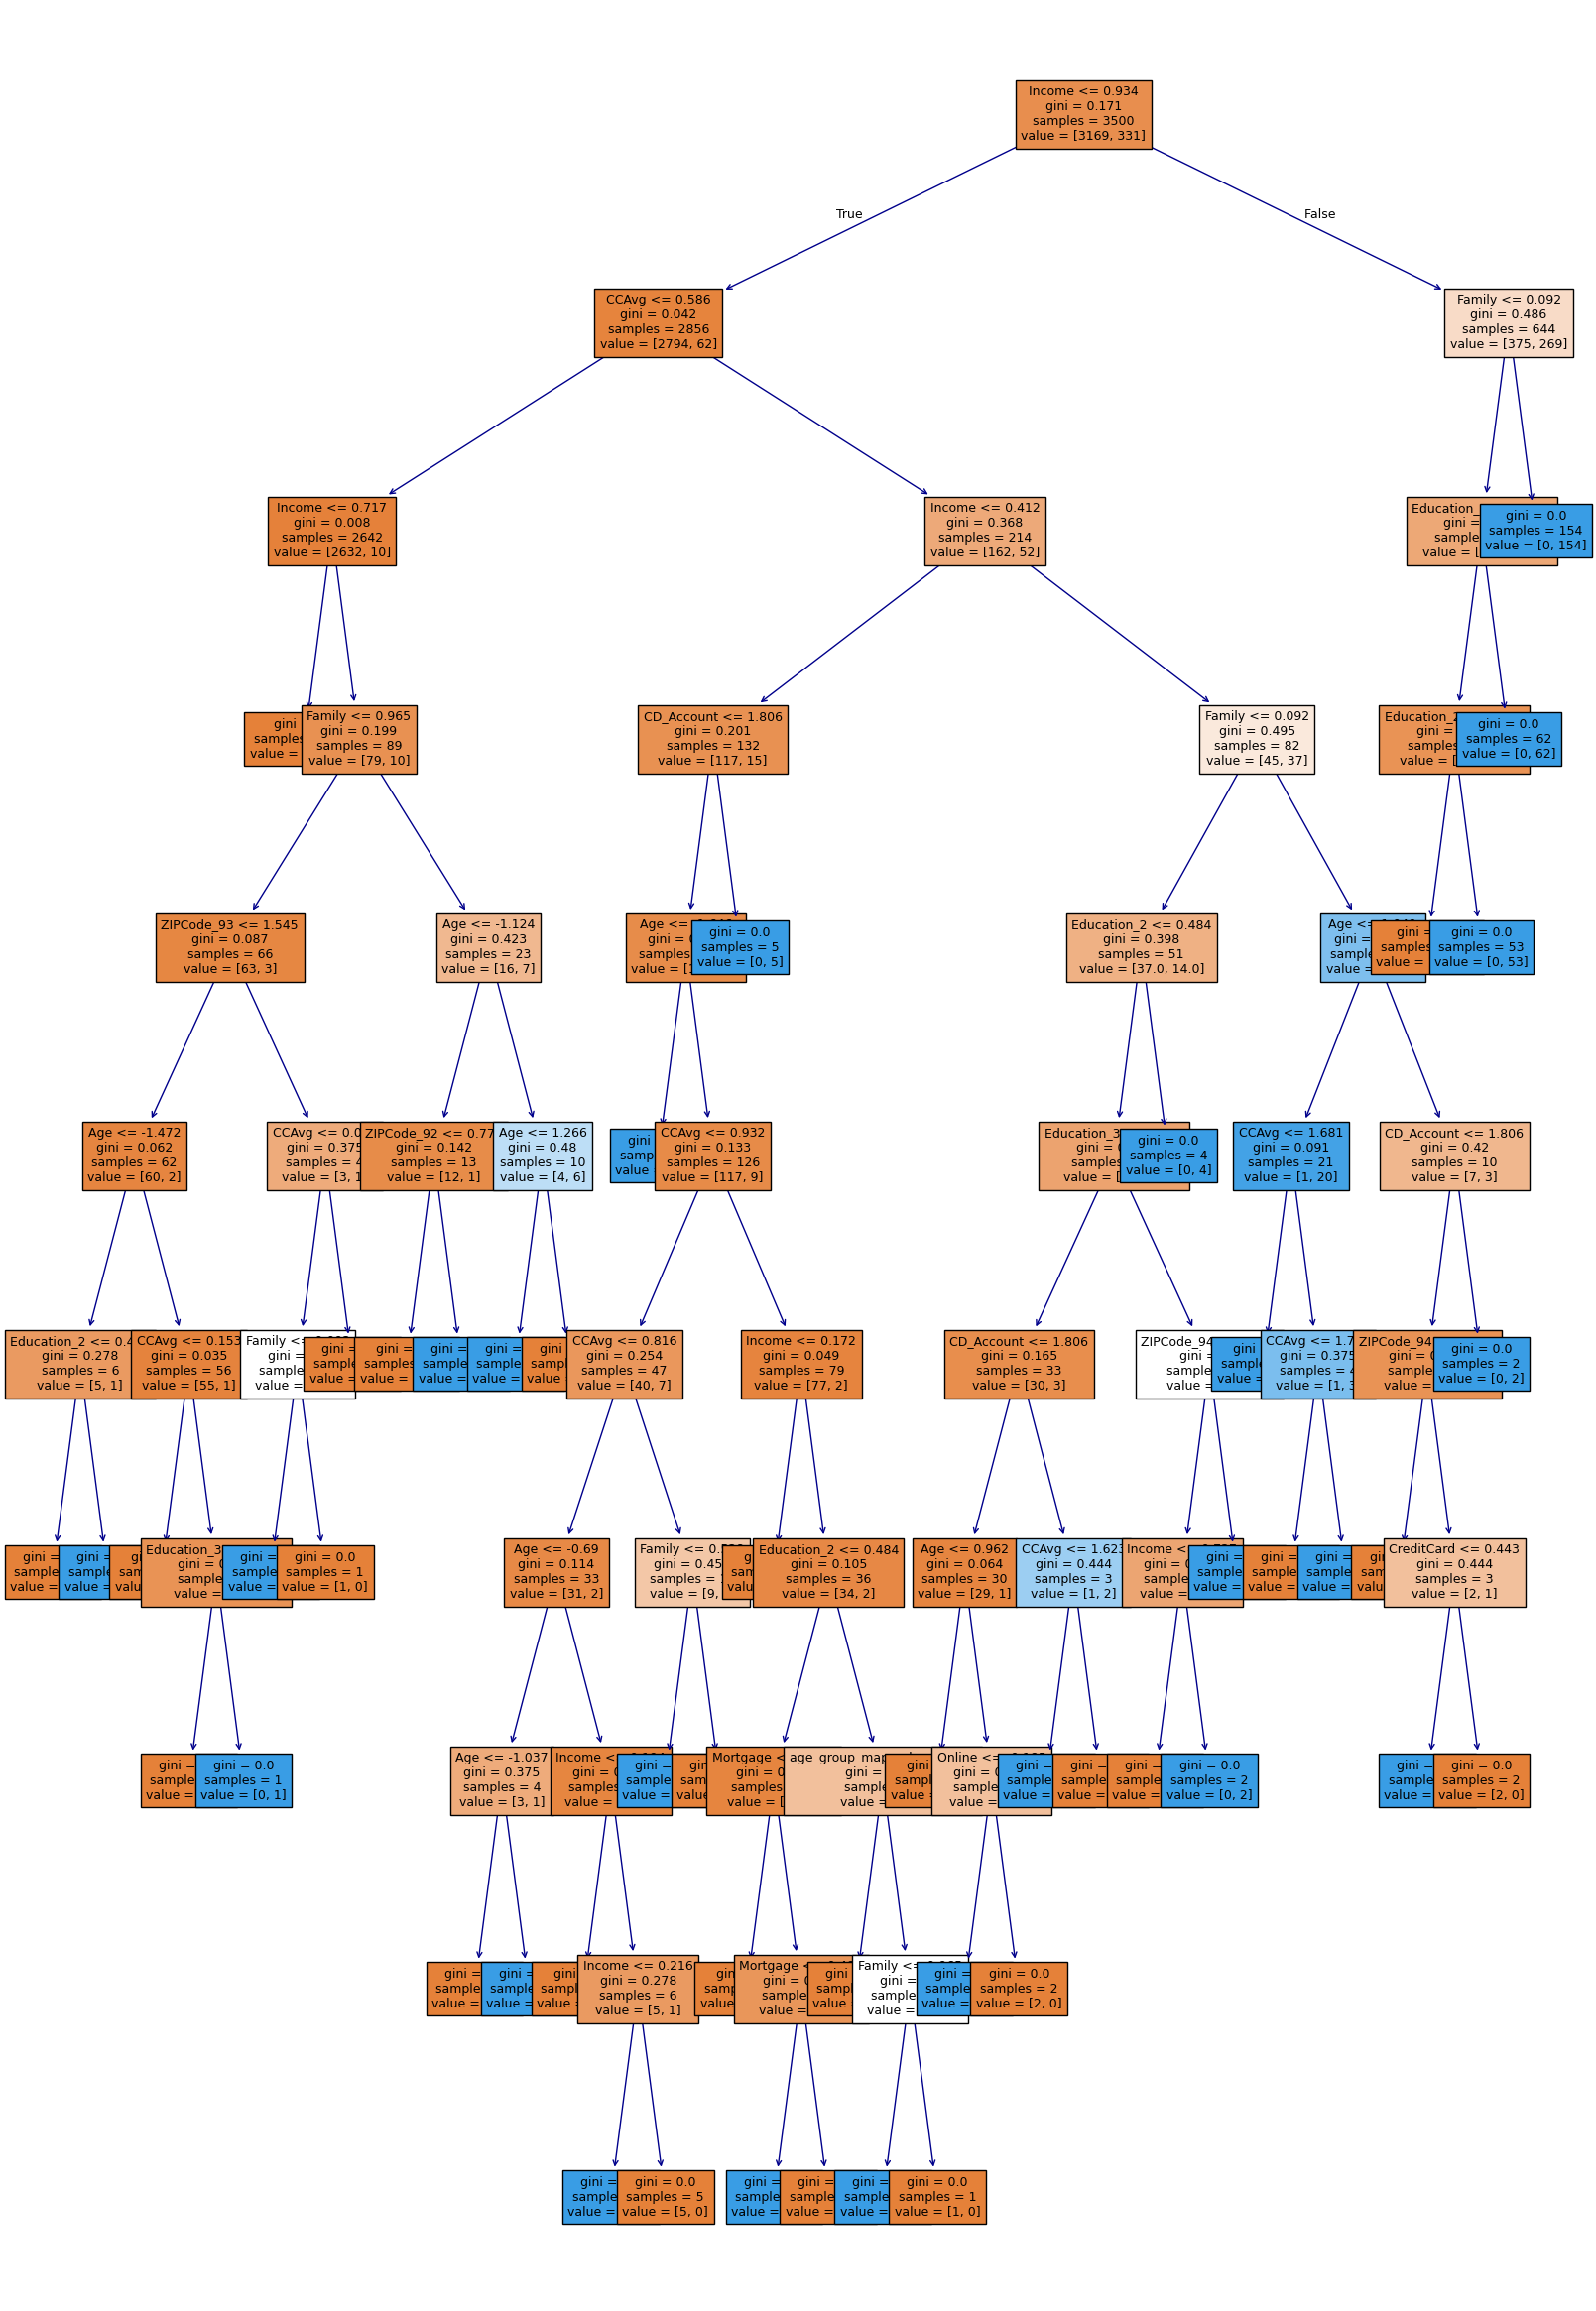

In [ ]:
plot_tree(base_model, feature_names)

In [ ]:
print_tree_text(base_model, feature_names)

                         Imp
Income              0.306430
Family              0.260924
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048777
Age                 0.030091
CD_Account          0.021361
ZIPCode_94          0.007183
Mortgage            0.003236
ZIPCode_92          0.003080
Online              0.002224
CreditCard          0.002224
ZIPCode_93          0.000594
age_group_mapped    0.000556
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


In [ ]:
# Text report showing the rules of a decision tree - base model

print(tree.export_text(base_model, feature_names=feature_names, show_weights=True))

|--- Income <= 0.93
|   |--- CCAvg <= 0.59
|   |   |--- Income <= 0.72
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  0.72
|   |   |   |--- Family <= 0.96
|   |   |   |   |--- ZIPCode_93 <= 1.54
|   |   |   |   |   |--- Age <= -1.47
|   |   |   |   |   |   |--- Education_2 <= 0.48
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.48
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  -1.47
|   |   |   |   |   |   |--- CCAvg <= 0.15
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  0.15
|   |   |   |   |   |   |   |--- Education_3 <= 0.43
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.43
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  1.54
|   |   |   |   |   |--- CCAvg <= 0.01
|   

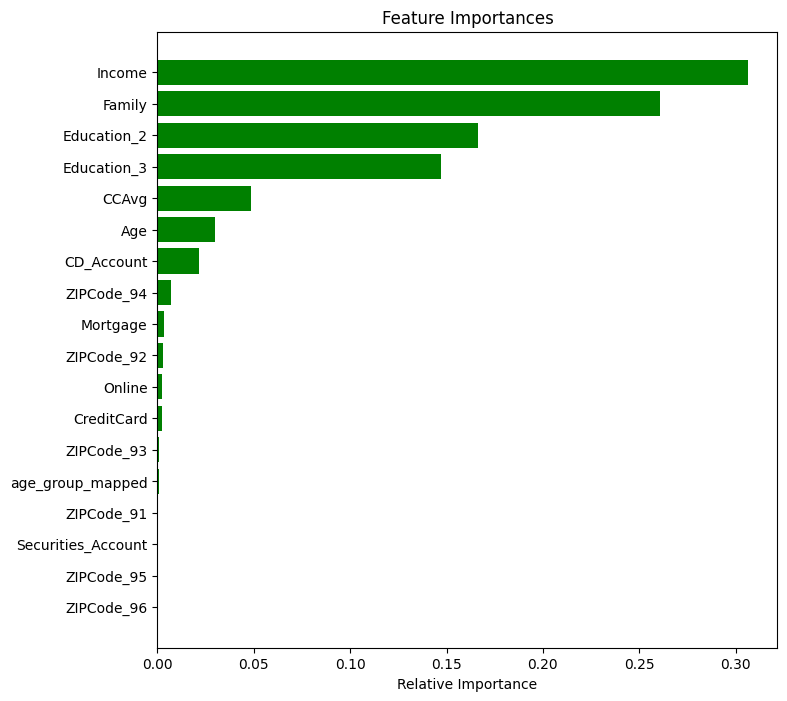

In [ ]:
plot_feature_importance(base_model, feature_names)

### **Observation:**

**Feature Importance**

*  The base_model.feature_importances_ gives the importance of each feature in determining the splits of the decision tree.

*    I’ve already calculated these, but here’s how I can display them nicely.

*   This will output the decision rules for each node in my tree, helping my understand which features and values lead to certain classifications.

## **Decision Tree Model on the Base_model Test-data**

In [ ]:
# Base model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_test, y_test)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_test = base_model.predict(X_test)

In [ ]:
print("Base Model Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Base Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Display the confusion matrix
print(conf_matrix)


[[1351    0]
 [   0  149]]


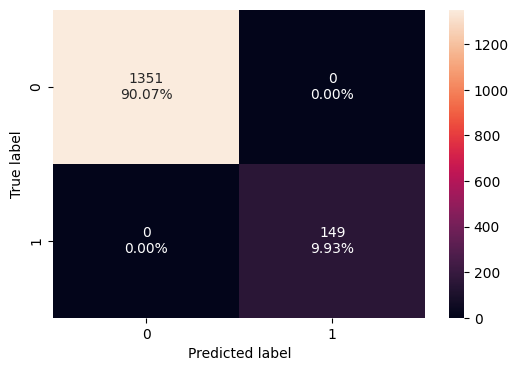

In [ ]:
confusion_matrix_sklearn(base_model, X_test, y_test)

In [ ]:
# Evaluation
model_performance_classification_sklearn(base_model, X_test, y_test)



,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
print_tree_text(base_model, feature_names)

                         Imp
Income              0.294350
Family              0.224268
Education_3         0.174194
Education_2         0.157831
CCAvg               0.050685
CD_Account          0.020784
Online              0.019560
Age                 0.018905
Mortgage            0.017801
age_group_mapped    0.012916
ZIPCode_93          0.008706
CreditCard          0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


### Observations:

**Accuracy:**

*   The base model achieved an accuracy of 1.0 (100%), meaning the model
predicted
every sample correctly on the test data. Accuracy is the ratio of correctly predicted samples to the total samples.

**Precision:**

*   Class 0 (non-loan customers): The precision for class 0 is 1.0, indicating that all predictions for class 0 were correct. No false positives (i.e., no customers were wrongly predicted as non-loan customers).

*   Class 1 (loan customers): The precision for class 1 is also 1.0, meaning all customers predicted to purchase personal loans actually did.

**Recall:**

*   Class 0: The recall for class 0 is 1.0, indicating that all actual non-loan customers were correctly identified by the model.

*   Class 1: The recall for class 1 is also 1.0, showing the model correctly identified all customers who actually purchased personal loans.

**F1-Score:**

*   The F1-score for both classes is 1.0, reflecting a perfect balance between precision and recall.

**Confusion Matrix:**

*   1351 true negatives (non-loan customers correctly classified as non-loan customers).

*   149 true positives (loan customers correctly classified as loan customers).

*   There are no false positives or false negatives, meaning no customers were misclassified.

## Decision Tree (Pre_Pruning)

## **Decision Tree Model on the Pre_Pruned Training-data**


In [ ]:
# Pre-pruning

max_depth_values=np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]
best_estimator=estimator_Pre_Pruning(max_depth_values, max_leaf_nodes_values, min_samples_split_values)

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# estimator_Pre_Pruning
estimator_Pre_Pruning = best_estimator
estimator_Pre_Pruning.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

In [ ]:
# Predictions
y_pred_train = estimator_Pre_Pruning.predict(X_train)

In [ ]:
# Evaluation
print("estimator_Pre_Pruning:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

estimator_Pre_Pruning: 0.7902857142857143
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      3169
           1       0.31      1.00      0.47       331

    accuracy                           0.79      3500
   macro avg       0.66      0.88      0.67      3500
weighted avg       0.93      0.79      0.83      3500



In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Display the confusion matrix
print(conf_matrix)

[[2435  734]
 [   0  331]]


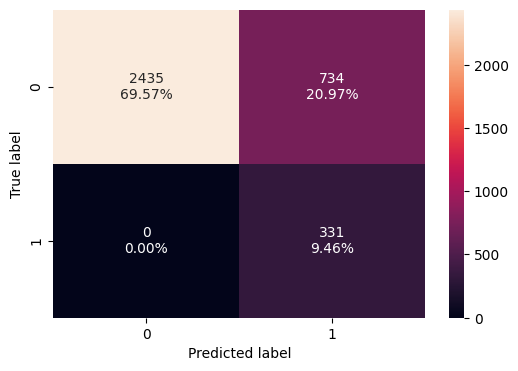

In [ ]:
confusion_matrix_sklearn(estimator_Pre_Pruning, X_train, y_train)

In [ ]:
model_performance_classification_sklearn(estimator_Pre_Pruning, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


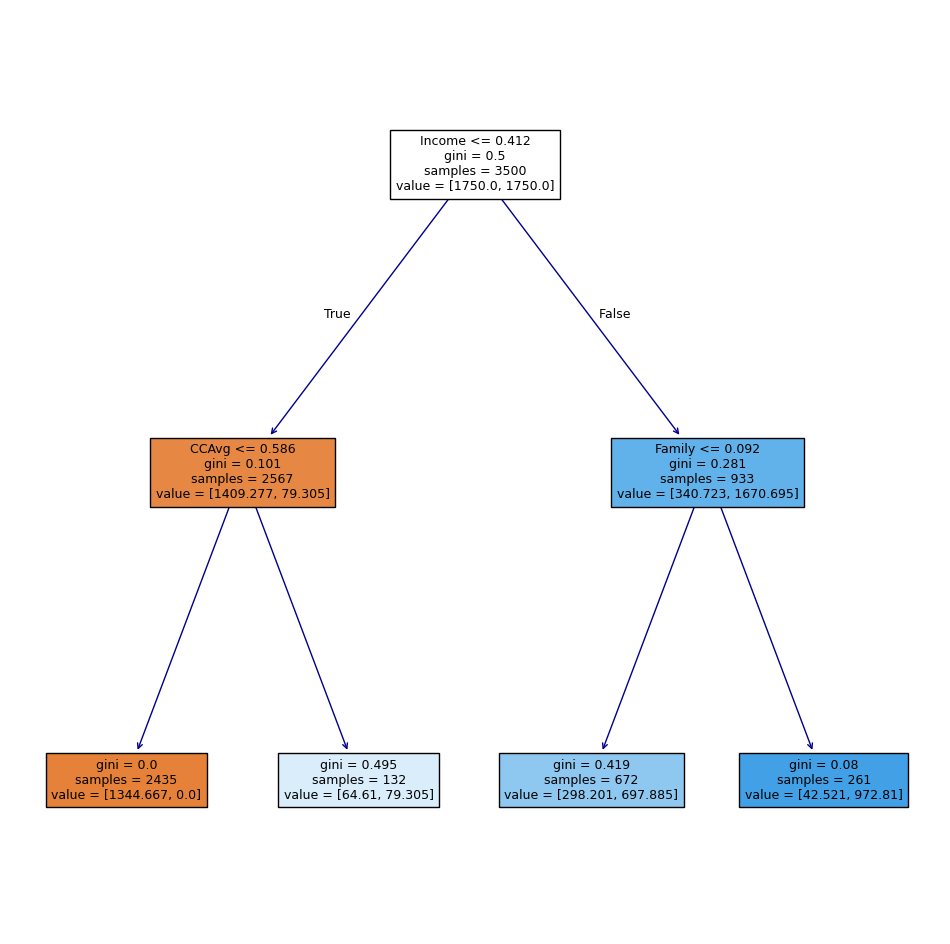

In [ ]:
plt.figure(figsize=(12, 12))
out = tree.plot_tree(
    estimator_Pre_Pruning,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("Darkblue")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree - estimator_Pre_Pruning

print(tree.export_text(estimator_Pre_Pruning, feature_names=feature_names, show_weights=True))

|--- Income <= 0.41
|   |--- CCAvg <= 0.59
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  0.59
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  0.41
|   |--- Family <= 0.09
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  0.09
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
print_tree_text(estimator_Pre_Pruning, feature_names)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
ZIPCode_92          0.000000
Education_2         0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
age_group_mapped    0.000000
ZIPCode_91          0.000000
CreditCard          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
Education_3         0.000000


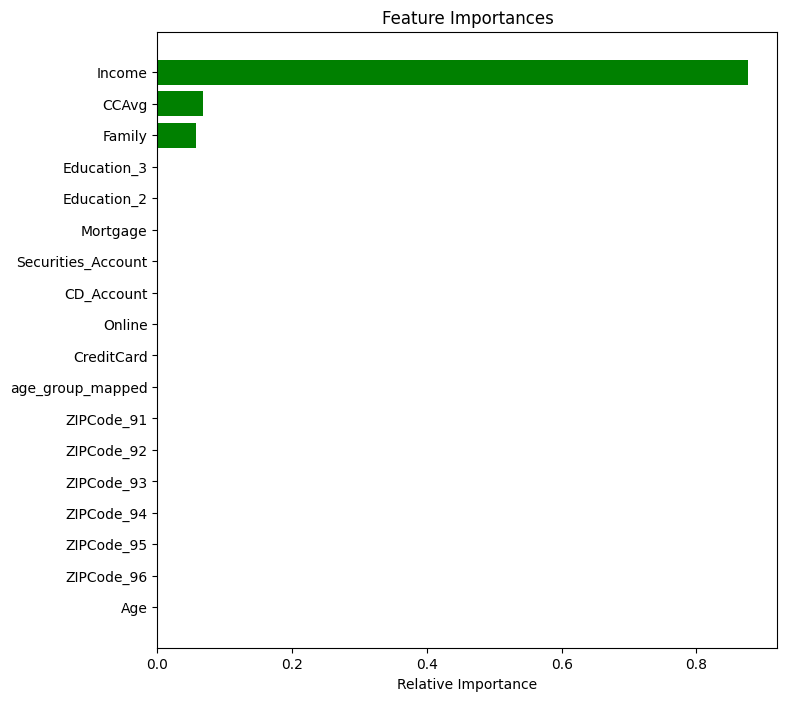

In [ ]:
plot_feature_importance(estimator_Pre_Pruning, feature_names)

### Observations:

**Accuracy:**

*   The accuracy of the pre-pruned model on the training data is 79.03%. This means that the model correctly predicted about 79% of the training samples. It indicates a balance between underfitting and overfitting, especially in comparison to the 100% accuracy of the base model.

**Precision:**

*   Class 0 (Non-loan customers): The precision for class 0 is 1.00, meaning that all predictions for non-loan customers were correct.

*   Class 1 (Loan customers): The precision for class 1 is relatively low at 0.31, which means that among all the customers predicted to purchase personal loans, only 31% were correct.

**Recall:**

*   Class 0: The recall for class 0 is 0.77, meaning the model identified 77% of the actual non-loan customers correctly.

*   Class 1: The recall for class 1 is 1.00, showing the model was able to capture all actual loan customers. However, this came at the cost of predicting some non-loan customers as loan customers, leading to the low precision for class 1.

**F1-Score:**

*   The F1-score for class 0 is 0.87, indicating a good balance between precision and recall.

*   For class 1, the F1-score is 0.47, showing that while the model captures all loan customers (high recall), it struggles with precision, leading to a lower overall F1-score for class 1.

**Confusion Matrix:**

*   2435 true negatives: Correctly predicted non-loan customers.
734 false positives: Non-loan customers incorrectly classified as loan customers.

*   331 true positives: Correctly predicted loan customers.
0 false negatives: The model did not miss any actual loan customers.

**Tree Visualization:**

*   The pre-pruned decision tree focuses mainly on two features: Income and Credit Card Average (CCAvg), with Income being the most important factor in splitting the data. The tree also uses Family size for further splits, particularly in higher income brackets.

**Feature Importance:**

*   Income is by far the most important feature, contributing 87.65% to the splits.

*   Credit Card Average (CCAvg) contributes 6.69%.

*   Family size accounts for 5.65%.

*   Other features such as age, ZIP code, and education have no importance in this specific model.

**Performance:**

*   The pre-pruning model shows a reduction in accuracy compared to the base model, but this is likely more realistic and generalizable. The model has learned to handle the data without overfitting, as seen in its lower complexity (using a maximum depth of 2 and max leaf nodes of 50).

**Precision vs. Recall:**

*   There is a significant trade-off between precision and recall for loan customers (class 1). The model has perfect recall but sacrifices precision, meaning it casts a wide net and incorrectly classifies many non-loan customers as potential loan customers.

**Model Improvement:**

*    While this pre-pruned model may generalize better than the base model, further tuning, possibly by adjusting hyperparameters or applying different pruning techniques, may be necessary to achieve better precision for class 1 without losing recall.

## **Decision Tree Model on the Pre_Pruned Test-data**

In [ ]:
# estimator_Pre_Pruning test data
estimator_Pre_Pruning = best_estimator
estimator_Pre_Pruning.fit(X_test, y_test)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

In [ ]:
# Predictions
y_pred_test = estimator_Pre_Pruning.predict(X_test)

In [ ]:
# Evaluation
print("estimator_Pre_Pruning Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

estimator_Pre_Pruning Accuracy: 0.7913333333333333
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1351
           1       0.32      1.00      0.49       149

    accuracy                           0.79      1500
   macro avg       0.66      0.88      0.68      1500
weighted avg       0.93      0.79      0.83      1500



In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Display the confusion matrix
print(conf_matrix)

[[1038  313]
 [   0  149]]


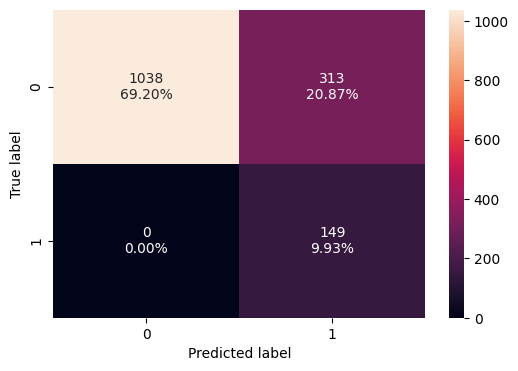

In [ ]:
confusion_matrix_sklearn(estimator_Pre_Pruning, X_test, y_test)

In [ ]:
model_performance_classification_sklearn(estimator_Pre_Pruning, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.791333,1.0,0.322511,0.487725


#### **Observations:**

**Accuracy:**

*   The accuracy of the pre-pruned model on the test data is 79.13%, which is consistent with its performance on the training data. This suggests that the model has learned general patterns from the data and is not overfitting.

**Precision:**

*   Class 0 (Non-loan customers): Precision for class 0 is 1.00, meaning all customers predicted as non-loan customers were correct.

*   Class 1 (Loan customers): Precision for class 1 is relatively low at 0.32, which indicates that among all the customers predicted to take out personal loans, only 32% were actually loan customers.

**Recall:**

*   Class 0: Recall for class 0 is 0.77, showing that the model correctly identified 77% of non-loan customers.

*   Class 1: Recall for class 1 is 1.00, meaning the model captured all loan customers in the test set. However, the low precision for class 1 indicates that this high recall comes at the cost of many false positives (non-loan customers classified as loan customers).

**F1-Score:**

*   The F1-score for class 0 is 0.87, indicating a good balance between precision and recall for non-loan customers.

*   For class 1, the F1-score is 0.49, which suggests that while the model captures all loan customers, it struggles with precision, leading to a moderate F1-score.

**Confusion Matrix:**

*   1038 true negatives: Correctly predicted non-loan customers.

*   313 false positives: Non-loan customers incorrectly classified as loan customers.

*   149 true positives: Correctly predicted loan customers.

*   0 false negatives: The model did not miss any actual loan customers.

**Model Performance Summary:**

*   Accuracy: The model's accuracy of 79.13% is a good sign that the model is capturing relevant patterns in the data.

*   Precision for Loan Customers (Class 1): At 0.32, the model has low precision for predicting loan customers, meaning a large proportion of the customers predicted to take loans did not actually do so.

*   Recall for Loan Customers (Class 1): A perfect recall of 1.00 shows the model captures all actual loan customers. However, this comes at the cost of precision, where many non-loan customers are misclassified as loan customers.

**Trade-off Between Precision and Recall:**

*   The model is highly sensitive in identifying loan customers (perfect recall) but lacks precision, leading to many false positives. This trade-off could be fine-tuned, possibly by adjusting the decision threshold or further hyperparameter tuning.

**Generalization:**

*    The model performs similarly on the training and test sets, indicating it generalizes well and is not overfitting.

## **Model Performance Improvement**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


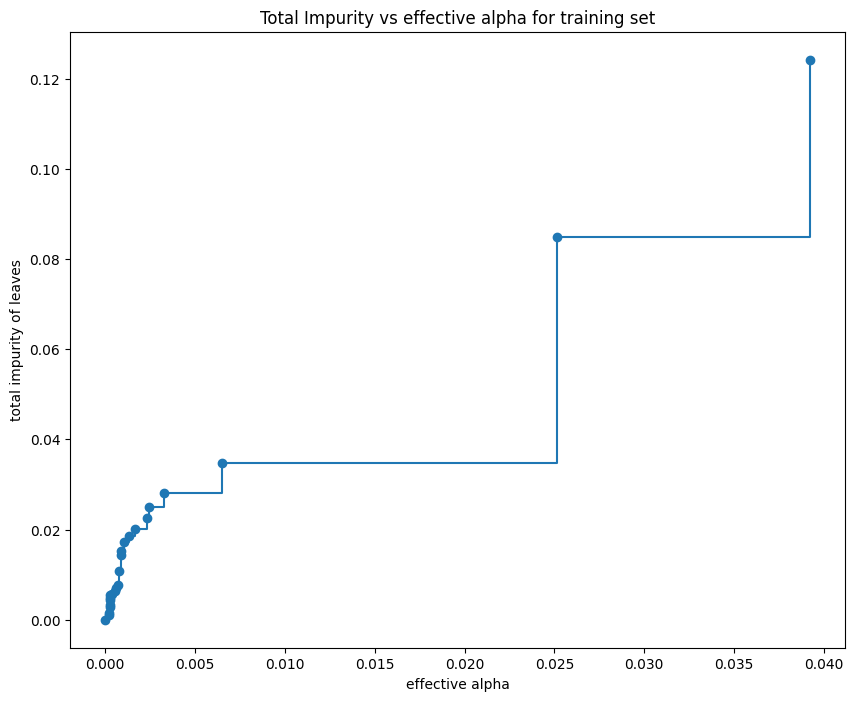

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

### **Observation**

**Impurity Decreases with Alpha:**

*   As the effective alpha increases (moving along the x-axis), the total impurity of leaves initially increases slightly and then decreases in steps. This is expected because higher alpha values introduce more aggressive pruning, resulting in simpler trees with fewer leaves and less overfitting. However, pruning also reduces the complexity of the model and can decrease the tree’s ability to capture nuanced patterns in the data.

**Stepwise Increase in Impurity:**

*   The plot shows sharp, stepwise increases in total impurity at certain alpha values. This is because at specific points, the decision tree prunes additional nodes, removing branches that contribute less to the model’s predictive accuracy. These jumps indicate where significant pruning occurs, leading to a less complex model.

**Optimal Alpha Range:**

*   The graph shows a fairly flat region at lower alpha values (around 0.001 to 0.005), indicating that the tree complexity is not reduced much in this region. The model’s total impurity remains low, suggesting minimal pruning is occurring here. This could be a good range to explore for balancing model complexity and overfitting.

**Trade-off Between Model Complexity and Impurity:**

*   Higher alphas (>0.02) show a more significant increase in total impurity, reflecting the removal of many branches, which can lead to underfitting. Thus, values in the lower alpha range are typically better for maintaining a balance between model complexity and predictive performance.

**Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.**

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)  # Fit decision tree on training data
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


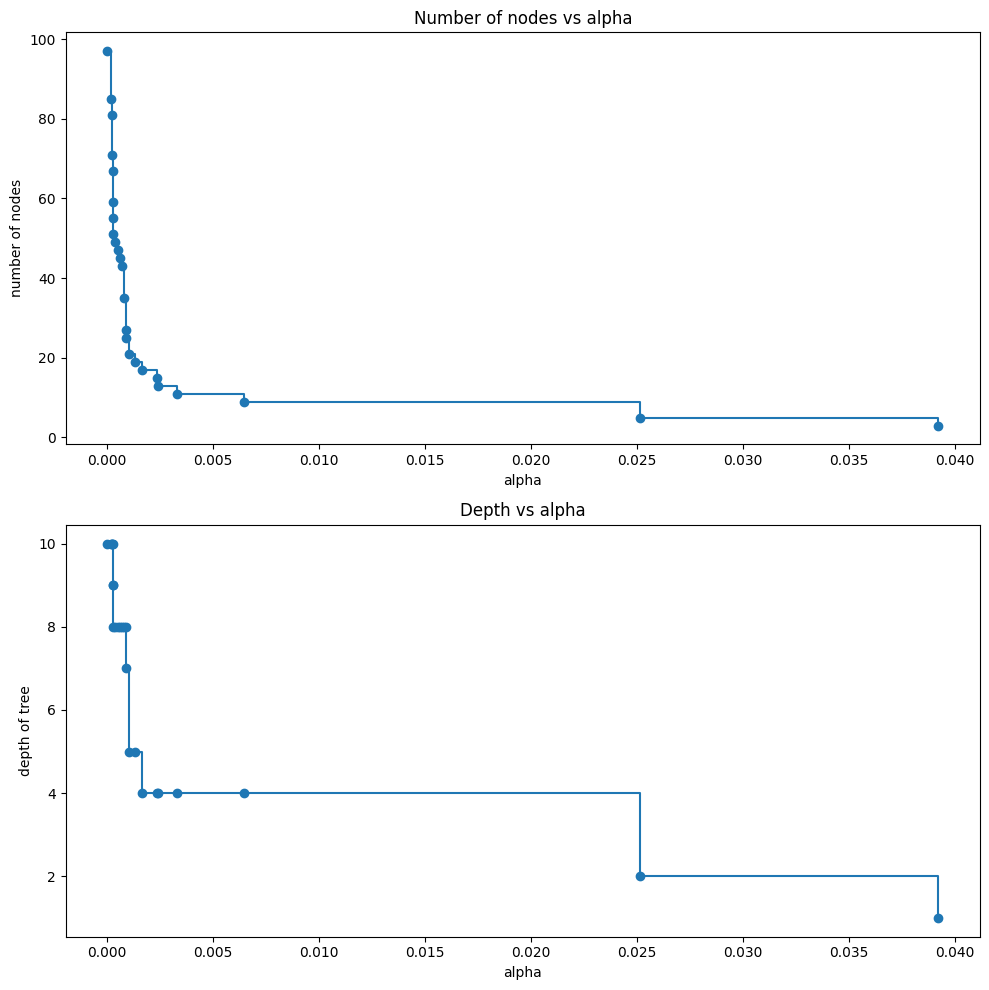

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

##Observations from the "Number of Nodes vs Alpha" and "Depth vs Alpha" Plots

**Number of Nodes vs Alpha (Top Plot):**

*   As the alpha value increases, the number of nodes in the decision tree decreases sharply.

*   For small values of alpha (close to 0), the tree has the maximum number of nodes (around 100 nodes), indicating a fully grown tree with many splits.

*   As alpha increases to approximately 0.005 or higher, there is a steep drop in the number of nodes, indicating that pruning is removing many nodes and reducing complexity.

*   Around an alpha value of 0.025, the number of nodes stabilizes at a very low level (around 3 or fewer nodes).

*   The tree becomes a single node (root) when alpha reaches its highest value, as shown by the last value in the series (alpha ~ 0.04), indicating extreme pruning.

**Depth vs Alpha (Bottom Plot):**

*   Similarly, the depth of the tree decreases as alpha increases.

*   At small alpha values, the tree's depth is at its maximum (depth ~ 10), meaning the tree is fully grown with deep splits.

*   There is a noticeable drop in depth as alpha increases, with sharp reductions between alpha ~ 0.005 and alpha ~ 0.025.

*   Beyond alpha ~ 0.025, the depth of the tree is reduced to very low values (depth ~ 1), meaning the tree has become shallow due to significant pruning.

*   At the maximum alpha, the depth becomes 1, indicating the tree has been pruned to a single root node.

# **Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

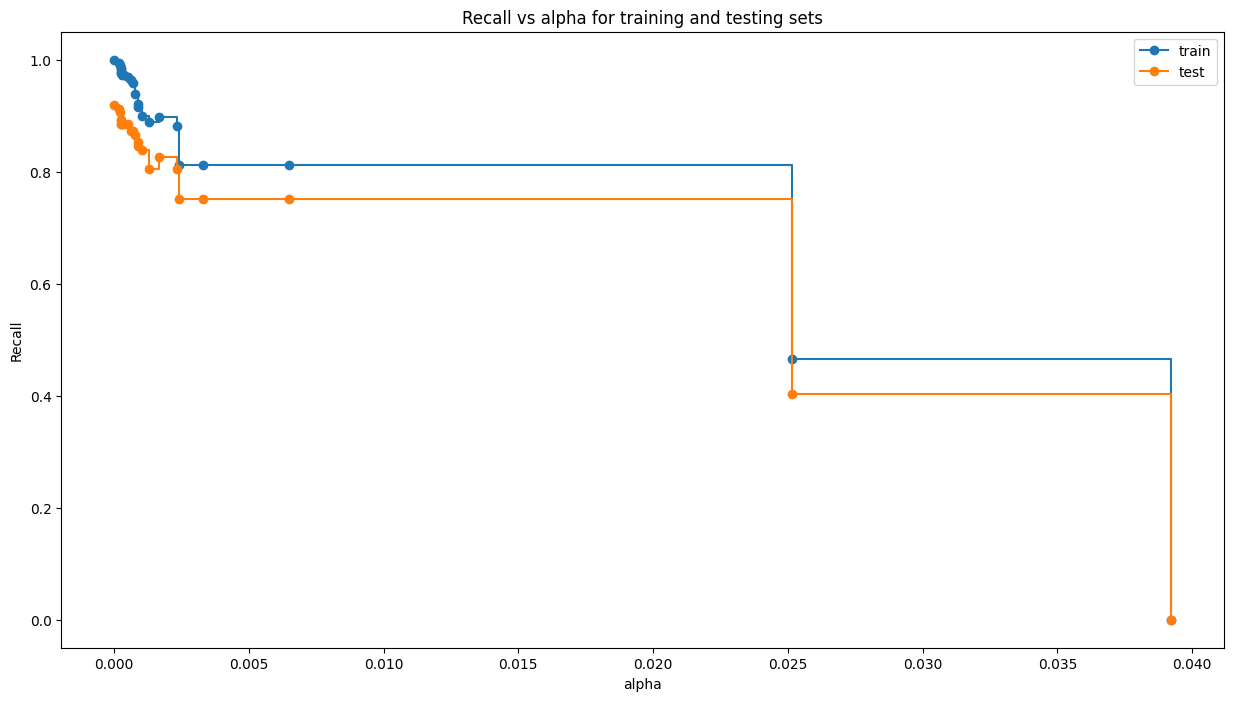

In [ ]:
# Create a plot
fig, ax = plt.subplots(figsize=(15, 8))
# Set labels and title
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
# Plot recall scores for training and test data
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
# Add a legend
ax.legend()
# Show the plot
plt.show()

### Observations from the "Recall vs Alpha for Training and Testing Sets" Plot

**Training Set (Blue Line):**  

*   The recall for the training set starts at nearly 1.0 when alpha is very small. This indicates that the unpruned decision tree overfits the training data, capturing almost all patterns and possibly noise.

*   As alpha increases, the recall gradually decreases. This trend reflects the reduction in model complexity due to pruning, which helps to generalize the model but reduces its ability to perfectly fit the training data.

*   There are sharp drops in recall when alpha exceeds 0.02 and again beyond 0.025. These drops correspond to aggressive pruning, which leads to a drastic reduction in the tree's ability to model the training data.

**Testing Set (Orange Line):**

*   For the test set, the recall starts lower than the training set, which is typical and indicates some overfitting at lower alpha values.

*   The recall fluctuates initially but remains stable across small alpha values. The test recall reaches a relatively consistent level from around alpha 0.005 to 0.02, indicating that the model is generalizing well without significant pruning.

*   After alpha ~ 0.025, the recall begins to drop sharply, similar to the training set. The large drop around alpha 0.04 suggests that the model is pruned too much, becoming too simple to capture important features, resulting in underfitting.

**Optimal Alpha Range:**

*   The optimal alpha for both training and test sets seems to be around 0.005 to 0.015. In this range, the test recall remains relatively stable, which suggests a good balance between model complexity and generalization.

*   The alpha values in this range avoid overfitting while retaining enough complexity to make accurate predictions.

**Overfitting and Underfitting:**

*   At very low alpha values (below 0.005), the training recall is high but the test recall is lower, indicating overfitting.

*   As alpha increases, the gap between training and test recall narrows, reducing overfitting. However, at higher alpha values (above 0.025), the model becomes too simple, leading to underfitting as the recall drops significantly for both training and test sets.

**Conclusion:**

*   The key takeaway is that choosing an appropriate alpha is critical to avoid overfitting and underfitting. In this case, an alpha value between 0.005 and 0.015 offers the best trade-off between model complexity and generalization, yielding good recall on the test set without overfitting the training set.

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
# Retrieve the ccp_alpha of the best model
best_ccp_alpha = best_model.ccp_alpha

In [ ]:
# Define a new DecisionTreeClassifier with the best ccp_alpha and class weights
Post_pruning_estimator = DecisionTreeClassifier(
    ccp_alpha=best_ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [ ]:
# Fit the model on the training data
Post_pruning_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# Output the result
print(f"Fitted Post_pruning_estimator_with ccp_alpha: {best_ccp_alpha}")

Fitted Post_pruning_estimator_with ccp_alpha: 0.0


## **Checking performance on Post-pruning training data**

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (3500, 18)
Shape of y_train: (3500,)


In [ ]:
# Fit the model after ensuring that X_train and y_train are aligned
Post_pruning_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# Predictions
y_train_pred = Post_pruning_estimator.predict(X_train)

In [ ]:
# Evaluation
print("Post_pruning_estimator Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Post_pruning_estimator Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       331

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [ ]:
# Create and print confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)


Confusion Matrix for Training Data:
[[3169    0]
 [   0  331]]


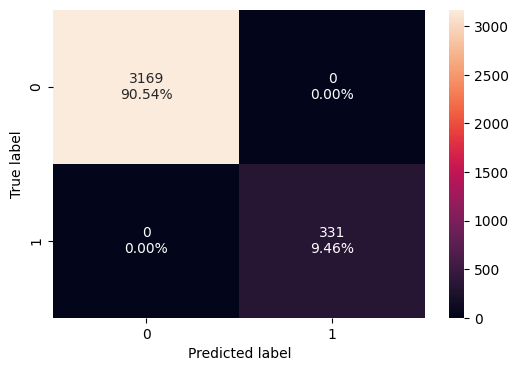

In [ ]:
confusion_matrix_sklearn(Post_pruning_estimator, X_train, y_train)

In [ ]:
model_performance_classification_sklearn(Post_pruning_estimator, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0



## Observation
**Accuracy**:

*   The model achieves 100% accuracy on the training data. While this might seem impressive, it could indicate overfitting, where the model has memorized the training data rather than learning generalizable patterns.

**Precision:**

*   Class 0 (Non-loan customers): Precision is 1.00, meaning that every customer predicted as a non-loan customer is correctly classified.

*   Class 1 (Loan customers): Similarly, precision is 1.00, indicating that every predicted loan customer was correctly classified.

**Recall:**

*   Class 0: Recall for non-loan customers is 1.00, which means the model has perfectly captured all non-loan customers in the training set.

*   Class 1: Recall for loan customers is also 1.00, indicating that the model captured all loan customers.

**F1-Score:**

*   Both classes have an F1-score of 1.00, suggesting a perfect balance between precision and recall for both non-loan and loan customers.

**Confusion Matrix:**

*   3169 true negatives: All non-loan customers are correctly classified.
0 false positives: There are no non-loan customers misclassified as loan customers.

*   331 true positives: All loan customers are correctly classified.
0 false negatives: There are no loan customers misclassified as non-loan customers.

**Model Performance Summary:**

**Accuracy:**

 *   A perfect accuracy of 1.00 is often a red flag when it comes to model training. While it indicates the model perfectly fits the training data, it raises concerns about overfitting.

**Precision and Recall:**

*   Both metrics being 1.00 for both classes suggests that the model has perfectly memorized the training data, potentially at the cost of generalizability.

**Overfitting Concern:**

*   The perfect performance on the training data suggests that the post-pruned model might have overfitted to the training set. This could lead to poor performance on unseen test data, as the model may not generalize well to new examples.

## Visualizing the Decision Tree

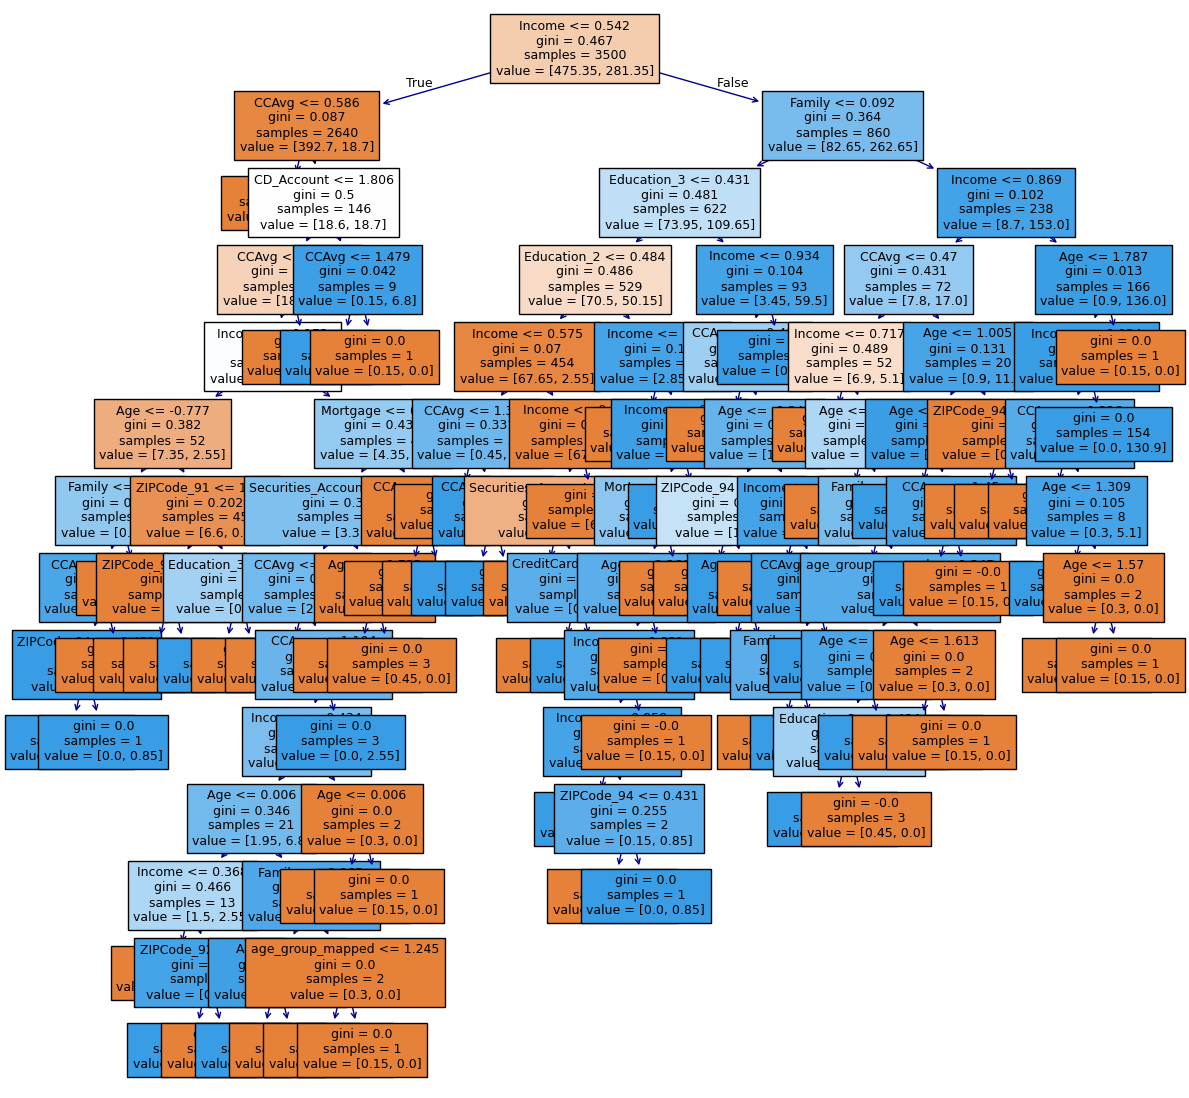

In [ ]:
plt.figure(figsize=(14, 14))
out = tree.plot_tree(
    Post_pruning_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("Darkblue")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree - Post_pruning_estimator

print(tree.export_text(Post_pruning_estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 0.54
|   |--- CCAvg <= 0.59
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  0.59
|   |   |--- CD_Account <= 1.81
|   |   |   |--- CCAvg <= 1.16
|   |   |   |   |--- Income <= 0.17
|   |   |   |   |   |--- Age <= -0.78
|   |   |   |   |   |   |--- Family <= 0.96
|   |   |   |   |   |   |   |--- CCAvg <= 0.90
|   |   |   |   |   |   |   |   |--- ZIPCode_94 <= 0.43
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- ZIPCode_94 >  0.43
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  0.90
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  0.96
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  -0.78
|   |   |   |   |   |   |--- ZIPCode_91 <= 1.20
|   |   |   |   |   |   |   |--- ZIPCode_93 <= 1.54
|   |   |   |   |   |   |   |   |--- weight

In [ ]:
print_tree_text(Post_pruning_estimator, feature_names)

                             Imp
Income              5.988796e-01
Education_2         1.383510e-01
CCAvg               7.959911e-02
Education_3         6.729348e-02
Family              6.696567e-02
Age                 1.797456e-02
CD_Account          1.099955e-02
Mortgage            5.040802e-03
Securities_Account  4.716203e-03
ZIPCode_94          4.701509e-03
ZIPCode_91          2.595832e-03
age_group_mapped    1.359803e-03
ZIPCode_92          8.015507e-04
CreditCard          7.213956e-04
ZIPCode_93          1.545285e-17
Online              0.000000e+00
ZIPCode_95          0.000000e+00
ZIPCode_96          0.000000e+00


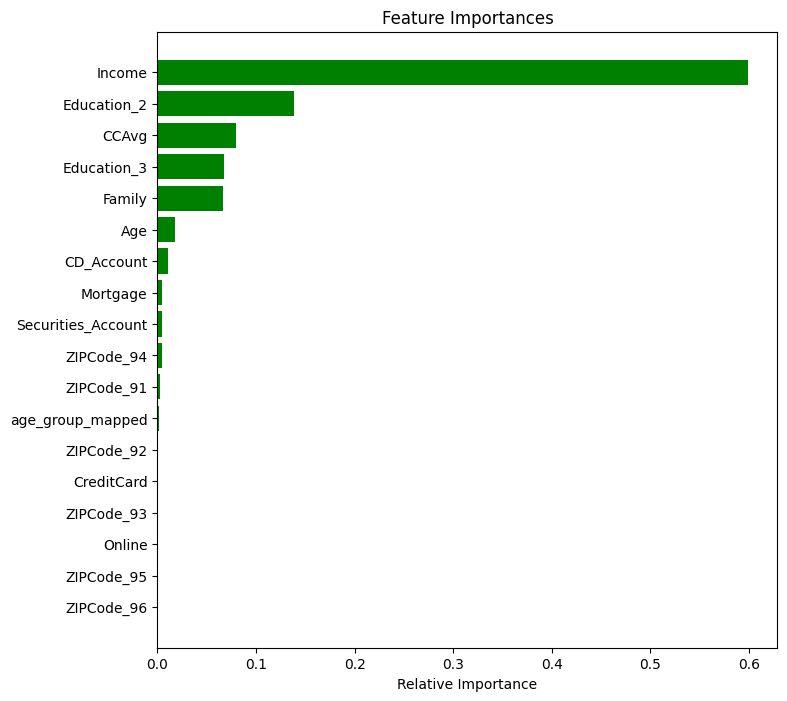

In [ ]:
plot_feature_importance(Post_pruning_estimator, feature_names)

## Observations

**Income as the Primary Split Feature:**

*   The decision tree begins by splitting on the feature Income <= 0.54. This suggests that income plays a crucial role in predicting whether a customer is likely to purchase a personal loan.

*   Customers with lower income (less than or equal to 0.54) are generally less likely to take out a personal loan, as indicated by the frequent prediction of class 0 (not taking a loan).

**CCAvg Influence:**

*   The second significant split within the lower-income group is on CCAvg (Credit Card Average Spending). This indicates that customers with lower credit card spending (CCAvg <= 0.59) are even less likely to take out a personal loan (with a strong class 0 prediction).

*   However, higher credit card spending (CCAvg > 0.59) in the lower-income bracket leads to further splits, which explore additional features such as CD_Account, Income, and Family.

**The Role of CD Accounts:**

*   For the subgroup where CCAvg > 0.59, the model splits based on whether the customer has a CD_Account <= 1.81. The presence of CD accounts appears to signal a higher likelihood of purchasing a loan, but this effect depends on other interacting features.

*   For example, those with higher CD account balances are generally classified as more likely to take a personal loan.

**Family Size and Education Influence on Higher Income Groups:**

*   In the higher income group (Income > 0.54), family size is a significant factor. For families with fewer members (Family <= 0.09), additional splits are made based on education level and credit card average spending.

*   Customers with higher education levels (particularly Education_3 > 0.43) and larger family sizes generally show a higher likelihood of taking personal loans.

**Zip Code Features (ZIPCode_94, ZIPCode_91):**

*   The model frequently uses ZIP code-related features in further splits, indicating that geographical location may have some influence on the likelihood of customers purchasing loans. However, these splits generally appear deeper in the tree and thus have a more nuanced impact.

**Importance of Mortgage, Securities Account, and CreditCard Features:**

*   Features like Mortgage, Securities_Account, and CreditCard are involved in several splits, particularly for customers with higher incomes and CCAvg values.
In certain splits, high values in CreditCard or the presence of a Securities_Account tends to increase the likelihood of customers taking out personal loans (class 1).

**Post-Pruning Effect:**

*   The post-pruning process helps to reduce the complexity of the tree by eliminating some less informative branches, leading to better generalization on unseen data.

*   The model has fewer deep branches, and irrelevant splits (those providing little additional information) have been pruned away, helping to reduce overfitting.

**Class Distributions:**

*   The tree consistently shows nodes with class distributions favoring either class 0 or class 1. Many leaves have highly skewed weightings, which means the model makes strong decisions for those splits.

*   Leaves with weights like [374.10, 0.00] indicate strong predictions for class 0, while nodes like [0.00, 6.80] clearly predict class 1.

**Threshold-Based Splits:**

*   The splits often occur at meaningful thresholds (e.g., Income <= 0.54, CCAvg <= 0.59), which correspond to certain customer behaviors. For instance, credit card spending patterns and income levels appear to be powerful indicators for loan purchase propensity.

**Summary:**

**Key Predictors:**

*   Income, CCAvg, Family, Education, and CD_Account are among the most influential features.

**Behavior of Lower-Income Customers:**

 *   Low-income customers with low credit card spending and no CD accounts are very unlikely to purchase personal loans.

**Behavior of Higher-Income Customers:**

*    Higher-income customers, especially those with high credit card spending, education levels, and family size, are more likely to take loans.

**Post-Pruning Outcome:**

 *   The post-pruning has simplified the tree, removing overfitting risks while retaining important decision paths that drive loan purchase predictions.

Observations on the Post-Pruned Decision Tree Model (Training Data)

In [ ]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test: (1500, 18)
Shape of y_test: (1500,)


In [ ]:
# Fit the model after ensuring that X_test and y_test are aligned
Post_pruning_estimator.fit(X_test, y_test)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# Predictions
y_test_pred = Post_pruning_estimator.predict(X_test)

In [ ]:
# Evaluation
print("Post_pruning_estimator Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Post_pruning_estimator Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
# Create and print confusion matrix test data
conf_matrix_train = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Data:")
print(conf_matrix_train)

Confusion Matrix for Test Data:
[[1351    0]
 [   0  149]]


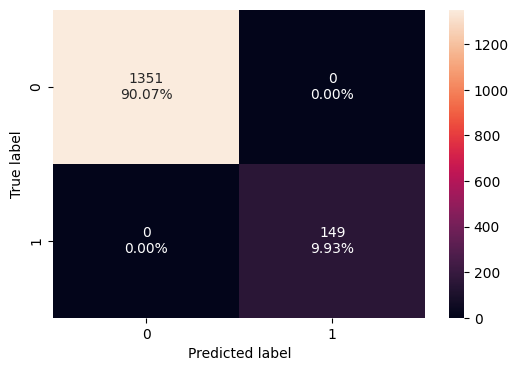

In [ ]:
confusion_matrix_sklearn(Post_pruning_estimator, X_test, y_test)

In [ ]:
model_performance_classification_sklearn(Post_pruning_estimator, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Observations on the Post-Pruned Decision Tree Model (Training Data)

**Perfect Accuracy:**

*   The model achieved an accuracy of 1.0, indicating that it correctly predicted all 1,500 test samples.

*   While high accuracy is typically a good sign, it may also suggest overfitting, especially if this performance does not generalize well to new or unseen data.

**Balanced Precision and Recall:**

*   The precision and recall for both classes (0 and 1) are also 1.0, meaning that the model perfectly classified both positive and negative classes:

*   recision (1.0): Every instance classified as positive (class 1) by the model was actually positive.

*   Recall (1.0): Every actual positive instance was correctly identified by the model.

*   This is confirmed by the f1-score of 1.0 for both classes, reflecting the model's strong balance between precision and recall.

**Confusion Matrix Analysis:**

*   The confusion matrix shows that the model perfectly predicted both class 0 (1351 samples) and class 1 (149 samples):

*   True Negatives (1351): All 1351 customers who did not take a loan (class 0) were predicted correctly.

*   True Positives (149): All 149 customers who took a loan (class 1) were predicted correctly.

*   No False Positives or False Negatives: There are no misclassifications (i.e., no instances of false positives or false negatives).

**Class Imbalance Handling:**

*   The class weighting {0: 0.15, 1: 0.85} used in the model training indicates an attempt to handle the class imbalance (where class 0 is much more frequent than class 1).

*   Despite the class imbalance, the model perfectly classified both classes, indicating the class weighting effectively helped the model learn the minority class (class 1) without bias towards the majority class (class 0).

**Possible Overfitting:**

*   Achieving perfect performance on the test set raises concerns about overfitting, especially given that decision trees tend to overfit if not properly pruned or regularized.

*   While post-pruning was applied, further testing with different validation datasets or cross-validation could help determine if the model's generalization to unseen data is robust.

**Model Robustness:**

*   While the results show perfect performance, it's essential to test the model on different datasets, including using cross-validation, to ensure the model isn't overly tailored to the specific test data used here.


# Model Performance Comparison and Final Model Selection

## **Training performance comparison**

In [ ]:
#Model Performance Comparison and Final Model Selection
# Function to calculate performance metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

In [ ]:
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
estimator_Pre_Pruning.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

In [ ]:
Post_pruning_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# Predictions on the training and testing sets
y_pred_train_base = base_model.predict(X_train)

In [ ]:
y_pred_train_pre_pruning = estimator_Pre_Pruning.predict(X_train)

In [ ]:
y_pred_train_post_pruning = Post_pruning_estimator.predict(X_train)

In [ ]:
# Compute metrics for training data
decision_tree_perf_train = pd.DataFrame(compute_metrics(y_train, y_pred_train_base), index=["base Model"]).T
decision_tree_tune_perf_train = pd.DataFrame(compute_metrics(y_train, y_pred_train_pre_pruning), index=["estimator_Pre_Pruning"]).T
decision_tree_tune_post_train = pd.DataFrame(compute_metrics(y_train, y_pred_train_post_pruning), index=["Post_pruning_estimator"]).T

In [ ]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [decision_tree_perf_train, decision_tree_tune_perf_train, decision_tree_tune_post_train], axis=1,
)

In [ ]:
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (estimator_Pre_Pruning)", "Decision Tree (Post_pruning_estimator)"]
print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Decision Tree (sklearn default)  \
Accuracy                               1.0   
Precision                              1.0   
Recall                                 1.0   
F1 Score                               1.0   

           Decision Tree (estimator_Pre_Pruning)  \
Accuracy                                0.790286   
Precision                               0.310798   
Recall                                  1.000000   
F1 Score                                0.474212   

           Decision Tree (Post_pruning_estimator)  
Accuracy                                      1.0  
Precision                                     1.0  
Recall                                        1.0  
F1 Score                                      1.0  


## **Testing performance comparison**

In [ ]:
base_model.fit(X_test, y_test)


DecisionTreeClassifier(random_state=42)

In [ ]:
estimator_Pre_Pruning.fit(X_test, y_test)


DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

In [ ]:
Post_pruning_estimator.fit(X_test, y_test)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
y_pred_test_base = base_model.predict(X_test)

In [ ]:
y_pred_test_pre_pruning = estimator_Pre_Pruning.predict(X_test)

In [ ]:
y_pred_test_post_pruning = Post_pruning_estimator.predict(X_test)

In [ ]:
# Compute metrics for testing data
decision_tree_perf_test = pd.DataFrame(compute_metrics(y_test, y_pred_test_base), index=["base Model"]).T
decision_tree_tune_perf_test = pd.DataFrame(compute_metrics(y_test, y_pred_test_pre_pruning), index=["estimator_Pre_Pruning"]).T
decision_tree_tune_post_test = pd.DataFrame(compute_metrics(y_test, y_pred_test_post_pruning), index=["Post_pruning_estimator"]).T

In [ ]:
# Testing performance comparison
models_test_comp_df = pd.concat(
    [decision_tree_perf_test, decision_tree_tune_perf_test, decision_tree_tune_post_test], axis=1,
)

In [ ]:
models_test_comp_df.columns = ["Decision Tree (base_model)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
print(models_test_comp_df)

Test set performance comparison:
           Decision Tree (base_model)  Decision Tree (Pre-Pruning)  \
Accuracy                          1.0                     0.791333   
Precision                         1.0                     0.322511   
Recall                            1.0                     1.000000   
F1 Score                          1.0                     0.487725   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Precision                           1.0  
Recall                              1.0  
F1 Score                            1.0  


## **Decision Tree (Base_model)**  

### Training Performance:

*   Accuracy, Precision, Recall, and F1 Score are all 1.0, indicating that the model perfectly classified the training data. This is a sign of potential overfitting.

### Testing Performance:

*   The metrics remain 1.0, suggesting that this model performs extremely well even on the testing data. However, a perfect score on both training and testing sets could also indicate a lack of generalization or an over-simplified problem with the dataset.

## **Decision Tree (Pre-Pruning)**

### Training Performance:

*   Accuracy: 0.79 – This model is not overfitting like the default model but sacrifices some accuracy.

*   Precision: 0.31 – The precision is very low, which means that out of the predicted positives, a large number of them were actually incorrect.

*   Recall: 1.0 – The model is able to recall all actual positives but is likely over-predicting the positive class (leading to low precision).

*   F1 Score: 0.47 – The low precision drags down the F1 score, indicating an imbalance between precision and recall.

### Testing Performance:

*   Accuracy: 0.79 – The accuracy is similar to the training set, indicating consistency.

*   Precision: 0.32 – The precision remains low, which indicates the model struggles with false positives.

*   Recall: 1.0 – Again, the model recalls all true positives but has imbalanced predictions.

*   F1 Score: 0.49 – Slightly better than the training score but still low due to the precision-recall trade-off.

## **Decision Tree (Post-Pruning)**

### Training Performance

*   Accuracy, Precision, Recall, and F1 Score are all 1.0, indicating perfect classification on the training set, similar to the default model. This suggests overfitting.

### Testing Performance:

*   Accuracy, Precision, Recall, and F1 Score are all 1.0 on the test set, indicating perfect predictions.

#### **Observation:**

*   Overfitting in Default and Post-Pruned Models: Both the default and post-pruned decision tree models have perfect scores on both the training and testing sets, which suggests overfitting. These models may not generalize well to unseen data, especially in more complex real-world scenarios.

*   Imbalance in Pre-Pruned Model: The pre-pruned model is more balanced in terms of avoiding overfitting, but its performance suffers significantly in precision. It has perfect recall (finding all positives), but the low precision (many false positives) indicates that the model may not be well-calibrated for predicting classes accurately.

### Final Model Selection:

*   Although the pre-pruned model avoids overfitting, its performance metrics show a trade-off between precision and recall, making it less effective overall.

*   The decision on which model to select should consider the business objective. If precision (reducing false positives) is crucial, neither pre-pruning nor post-pruning models are ideal. The default model might be preferable due to its consistent performance across both training and testing data, but overfitting risks should be addressed by additional validation or using more complex datasets.

# Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___

#### Based on the performance comparison of the decision tree models, here are actionable insights and business recommendations for AllLife Bank's project aimed at identifying potential customers for personal loans.

## Recommendation on Model Selection

*   Default and Post-Pruned Models (Perfect Performance): Both the default and post-pruned decision trees show perfect accuracy, precision, recall, and F1 score. While this might look appealing, perfect metrics often indicate overfitting, which can lead to poor performance when the model encounters new, unseen data. Over-relying on these models could give the bank overly optimistic results, potentially leading to false assumptions about customer behavior.

**Recommendation:**

*   Perform cross-validation and evaluate the models on out-of-sample data (e.g., a validation set or future unseen data). If the performance drops, consider adding more features or refining the model further.

## Pre-Pruned Model (Balanced but Suboptimal Performance)

*   The pre-pruned model avoids overfitting but has low precision (around 0.31 on training and 0.32 on test data). This means it predicts a significant number of false positives, i.e., it may incorrectly classify many customers as likely to take a loan when they are not.

**Recommendation:**

 *   Use this model with caution. Since it has high recall (1.0), it’s useful for targeting a broad audience, but false positives might increase marketing costs by promoting to customers who are not genuinely interested in loans. This can be mitigated by combining the model with additional rules or filtering to focus on a subset of high-probability customers.

## Insights for Targeted Marketing

**Precision vs. Recall Trade-off:**

*    Depending on the business strategy, AllLife Bank should weigh the cost of false positives (targeting customers who will not take a loan) against the cost of false negatives (missing out on customers who would take a loan).

*   If the goal is to minimize marketing costs, focus on precision (customers who are most likely to convert). A model with high precision would allow the bank to reduce unnecessary offers and focus marketing efforts on a more specific group of potential customers.

*   If the goal is to maximize customer outreach and ensure that no potential loan applicants are missed, prioritize recall. This may result in more false positives, but the bank can cast a wider net to capture all potential loan customers.

## Customer Segmentation for Loan Offers

*   High Recall Pre-Pruned Model for Broad Outreach: This model is ideal for segmenting customers with the highest likelihood of loan adoption. However, given its low precision, the bank should focus on identifying additional features (e.g., more detailed spending habits, additional credit history variables) to improve prediction accuracy and reduce false positives.

*   Segment Marketing Strategies: Use different strategies for different customer groups. For customers with high predicted probabilities from the default/post-pruned models, more personalized loan offers could be used. For broader segments predicted by the pre-pruned model, cheaper, less direct marketing strategies like email or online ads might be more cost-effective.

##Post-Model Refinement

**Further Model Tuning:**

 *   Fine-tune the hyperparameters to improve the precision of the pre-pruned model while maintaining its strong recall. Incorporating techniques such as grid search, random search, or advanced boosting methods like XGBoost or Random Forest could lead to better generalization and more balanced results.

**Consider Cost-Sensitive Learning:**

*   Since the cost of false positives (unnecessary marketing) and false negatives (lost customers) differ, apply cost-sensitive decision trees or threshold tuning to find an optimal balance that fits AllLife Bank’s business goals.

**Business Recommendations:**

*   Optimize Marketing Budget: If the bank prefers a conservative approach, focus on models with higher precision to reduce marketing spend. However, if the bank aims to capture a large customer base and is willing to absorb some false positives, the high-recall pre-pruned model may be more appropriate.

**Monitor Customer Behavior:**

*    Once the model is deployed, regularly monitor loan adoption rates and fine-tune the model based on actual customer responses to the marketing campaigns. This can help adapt the strategy over time, improving overall efficiency and customer engagement.

##Expand Features for Better Predictions

*    Consider expanding the dataset with additional customer behavioral data, such as credit scores, past financial products adoption, and real-time engagement (e.g., website interactions or spending trends), to enhance the model's ability to predict customer loan adoption more accurately.

*   By focusing on model refinement and adopting a segmented marketing approach, AllLife Bank can optimize customer outreach for personal loans while managing marketing costs effectively.